In [338]:
!pip install rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [339]:
# %%R
# remotes::install_github("cran/alr3")

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import datetime
import re
from sklearn.preprocessing import StandardScaler
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects import numpy2ri
from sklearn.linear_model import LogisticRegression

# **LOAD DATAFRAME**

In [341]:
!wget https://opendata.arcgis.com/datasets/4063314923d74187be9596f10d034914_0.csv -O annual-surface-temperature-change.csv
!wget https://opendata.arcgis.com/datasets/b84a7e25159b4c65ba62d3f82c605855_0.csv -O change-in-mean-sea-level.csv
!wget https://opendata.arcgis.com/datasets/66dad9817da847b385d3b2323ce1be57_0.csv -O forest-and-carbon.csv
!wget https://opendata.arcgis.com/datasets/b13b69ee0dde43a99c811f592af4e821_0.csv -O climate-related-disasters-frequency.csv

--2024-05-25 15:51:29--  https://opendata.arcgis.com/datasets/4063314923d74187be9596f10d034914_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 44.215.202.167, 54.197.243.216, 23.23.51.121
Connecting to opendata.arcgis.com (opendata.arcgis.com)|44.215.202.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘annual-surface-temperature-change.csv’

annual-surface-temp     [ <=>                ] 184.93K   969KB/s    in 0.2s    

2024-05-25 15:51:30 (969 KB/s) - ‘annual-surface-temperature-change.csv’ saved [189366]

--2024-05-25 15:51:30--  https://opendata.arcgis.com/datasets/b84a7e25159b4c65ba62d3f82c605855_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 44.215.202.167, 54.197.243.216, 23.23.51.121
Connecting to opendata.arcgis.com (opendata.arcgis.com)|44.215.202.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘change-in-mean-sea-level.csv

In [342]:
ASTC = pd.read_csv('annual-surface-temperature-change.csv')
CIMSL = pd.read_csv('change-in-mean-sea-level.csv')
CRDF = pd.read_csv('climate-related-disasters-frequency.csv')
FAC = pd.read_csv('forest-and-carbon.csv')

# **OVERALL DEFINITION**

In [343]:
East_Asia = [
    "China, P.R.: Mainland",
    'Japan',
    "Korea, Dem. People's Rep. of",
    'Korea, Rep. of',
    'Taiwan Province of China',
    'China, P.R.: Macao',
    'Mongolia',
    'China, P.R.: Hong Kong'
]

Southeast_Asia = [
    'Thailand',
    'Myanmar',
    "Lao People's Dem. Rep.",
    'Cambodia',
    'Vietnam',
    'Singapore',
    'Indonesia',
    'Malaysia',
    'Brunei Darussalam',
    'Philippines',
    'Timor-Leste, Dem. Rep. of'
]

Africa = [
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    'Mayotte',
    'Mozambique',
    'Rwanda',
    'Seychelles',
    'Somalia',
    'Tanzania, United Republic of',
    'Uganda',
    'Zambia',
    'Zimbabwe'
]

Middle_Africa = [
    'Angola',
    'Cameroon',
    'Central African Rep.',
    'Chad',
    'Congo',
    'Equatorial Guinea',
    'Gabon',
    'São Tomé and Príncipe, Dem. Rep. of'
]

Northern_Africa = [
    'Algeria',
    'Egypt',
    'Libya',
    'Morocco',
    'South Sudan',
    'Sudan',
    'Tunisia',
    'Western Sahara'
]

Southern_Africa = [
    'Botswana',
    'Eswatini',
    'Lesotho',
    'Namibia',
    'South Africa'
]

Western_Africa = [
    'Benin',
    'Burkina Faso',
    'Cabo Verde',
    'Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Saint Helena',
    'Senegal',
    'Sierra Leone',
    'Togo'
]

Caribbean = [
    'Anguilla',
    'Antigua and Barbuda',
    'Aruba',
    'Bahamas',
    'Barbados',
    'British Virgin Islands',
    'Cayman Islands',
    'Cuba',
    'Dominica',
    'Dominican Rep.',
    'Grenada',
    'Guadeloupe',
    'Haiti',
    'Jamaica',
    'Martinique',
    'Montserrat',
    'Puerto Rico',
    'St. Kitts and Nevis',
    'St. Lucia',
    'St. Vincent and the Grenadines',
    'Trinidad and Tobago',
    'Turks and Caicos Islands',
    'Virgin Islands'
]

Central_America = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Mexico',
    'Nicaragua',
    'Panama'
]

South_America = [
    'Argentina',
    'Bolivia',
    'Brazil',
    'Chile',
    'Colombia',
    'Ecuador',
    'Falkland Islands (Malvinas)',
    'Guyana',
    'Paraguay',
    'Peru',
    'Suriname',
    'Uruguay'
]

Northern_America = [
    'Canada',
    'Greenland',
    'Saint Pierre and Miquelon',
    'United States',
    'Pitcairn Islands'
]

MIDDLE_EAST = [
    'Bahrain',
    'Iraq',
    'Iran',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    # 'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'United Arab Emirates',
    'Yemen'
]

OCEANIA = [
    'Australia',
    'Fiji',
    'French Polynesia',
    # 'Guam',
    'Kiribati',
    'Marshall Islands',
    'Micronesia',
    'New Caledonia',
    'New Zealand',
    'Papua New Guinea',
    'Samoa',
    'American Samoa',
    'Solomon Islands',
    'Tonga',
    'Vanuatu',
    'Nauru, Rep. of',
    'Niue',
    'Norfolk Island',
    'Palau, Rep. of',
    'Tokelau',
    'Tuvalu'
]

ASIA = [
    'Afghanistan',
    'Armenia',
    'Azerbaijan',
    'Bangladesh',
    'Bhutan',
    'Brunei Darussalam',
    'Cambodia',
    'China',
    'Georgia',
    'Hong Kong',
    'India',
    'Indonesia',
    'Japan',
    'Kazakhstan',
    "Korea, Dem. People's Rep. of",
    'Korea, Rep. of',
    'Kyrgyz Rep.',
    "Lao People's Dem. Rep.",
    'Macao',
    'Malaysia',
    'Maldives',
    'Mongolia',
    'Myanmar',
    'Nepal',
    'Pakistan',
    'Philippines',
    'Singapore',
    'Sri Lanka',
    'Taiwan',
    'Tajikistan',
    'Thailand',
    'Timor-Leste, Dem. Rep. of',
    'Turkmenistan',
    'Uzbekistan',
    'Vietnam'
]

EUROPE = [
    'Albania',
    'Andorra',
    'Belarus',
    'Bosnia',
    'Croatia',
    'Faroe Islands',
    'Gibraltar',
    'Iceland',
    'Isle of Man',
    'Liechtenstein',
    'Moldova',
    'Monaco',
    'Montenegro',
    'North Macedonia',
    'Norway',
    'Russia',
    'San Marino',
    'Serbia',
    'Switzerland',
    'Ukraine',
    'United Kingdom',
    'Holy See'
]

EUROPEAN_UNION = [
    'Austria',
    'Belgium',
    'Bulgaria',
    'Cyprus',
    'Czech Rep.',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Ireland',
    'Italy',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Malta',
    'Netherlands',
    'Poland',
    'Portugal',
    'Romania',
    'Slovak Rep.',
    'Slovenia',
    'Spain',
    'Sweden'
]

In [344]:
regions = [
    East_Asia,
    Southeast_Asia,
    Africa,
    Middle_Africa,
    Northern_Africa,
    Southern_Africa,
    Western_Africa,
    Caribbean,
    Central_America,
    South_America,
    Northern_America,
    MIDDLE_EAST,
    OCEANIA,
    ASIA,
    EUROPE,
    EUROPEAN_UNION
]


In [345]:
name_regions = [
    'East_Asia',
    'Southeast_Asia',
    'Africa',
    'Middle_Africa',
    'Northern_Africa',
    'Southern_Africa',
    'Western_Africa',
    'Caribbean',
    'Central_America',
    'South_America',
    'Northern_America',
    'MIDDLE_EAST',
    'OCEANIA',
    'ASIA',
    'EUROPE',
    'EUROPEAN_UNION'
]



---



# **DEFINE FUNCTION QUESTION 1**

## **ANNUAL SURFACE TEMPERATURE CHANGE**

### **PLOT COUNTRY RECORDS**

In [346]:
def plot_country_records(dataframe, countries, x_coordinate):
    figure = make_subplots(rows=len(countries),
                           cols=1,
                           subplot_titles=[f'Territories of {c_name}' for c_name in countries])
    num_country = len(countries)
    cur_row = 1
    for c in countries:
        c_index = [index for index, country in enumerate(dataframe['Country'].values) if c in country]
        c_df = dataframe.iloc[c_index, :]

        c_countries = c_df['Country'].values
        c_values = c_df[x_coordinate].values
        sub_figure = []
        for country, value in zip(c_countries, c_values):
            y_coordinate = value
            legendgroup = str(cur_row)
            scatter = go.Scatter(x=x_coordinate,
                                 y=y_coordinate,
                                 name=country,
                                 legendgroup=legendgroup)

            sub_figure.append(scatter)
        for trace in sub_figure:
            figure.append_trace(trace, row=cur_row, col=1)

        cur_row += 1
    figure.update_xaxes(tickangle=90)
    figure.update_layout(
            height = 500 + num_country * 225,
            width = 1200,
            legend_tracegroupgap=200)
    figure.show()

### **EDA - PLOT ALL RECORDS**

In [347]:
def plot_all_records(dataframe, x_coordinate, title='', ytitle='Degree Celcius', getTrace=1):
    year_index = x_coordinate.copy()
    values = dataframe[x_coordinate].values
    countries = dataframe['Country'].values

    fig = go.Figure()
    traces = []
    for country, value in zip(countries, values):
        trace = go.Scatter(x=year_index, y=value, mode='lines', name=country, showlegend=True)
        traces.append(trace)
        fig.add_trace(trace)
    fig.update_layout(title=f'{title} From 1961 to 2022',
                    xaxis_title='Year',
                    yaxis_title=ytitle)
    if getTrace:
        return traces
    fig.show()


### **EDA BY REGION**

In [348]:
def eda_by_region(dataframe, x_coordinate, regions=regions):
    figure = make_subplots(rows=len(regions), cols=1, shared_xaxes=True, subplot_titles=name_regions)
    curRow = 1
    for name, region in zip(name_regions, regions):
        redion_idx = [idx for idx, country in enumerate(dataframe['Country'].values) if country in region]
        region_df = dataframe.loc[redion_idx]
        traces = plot_all_records(region_df, x_coordinate, title=f'{name}', getTrace=1)
        for trace in traces:
            # print(trace)
            figure.append_trace(trace, row=curRow, col=1)
        curRow += 1

    figure.update_layout(height=300 * len(regions), title_text="All Records")
    figure.show()

### **COUNT FREQUENCIES OF UNIQUE VALUE**

In [349]:
def unique_val_cnt_freq(dataframe, feature):
    unique_info = dataframe[feature].value_counts()
    uni_index = unique_info.index
    uni_cnts = unique_info.values

    return uni_index, uni_cnts

### **COUNT EACH FEATURE NUMBER OF UNIQUE VALUE OF DATAFRAME**

In [350]:
def cnt_feature_unival(dataframe, features):
    feature_unique_cnts = []
    for col in features:
        # col = col[0]
        cnt = len(dataframe[col].unique())
        feature_unique_cnts.append(cnt)

    return feature_unique_cnts

In [351]:
def plot_cnt_feature_unival(feature_unique_cnts, features):
    plt.figure(figsize=(15, 15))
    bars = plt.barh(features, feature_unique_cnts, color="skyblue")
    plt.xticks(rotation=90)
    for bar, cnt in zip(bars, feature_unique_cnts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{cnt:.2f}',
                va='center_baseline', ha='left', fontsize=8, color='black')

    plt.show()

### **KNN IMPUTER**

In [352]:
from sklearn.impute import KNNImputer

### FILLING MISSING VALUES IN LOCAL REGION/TERRITORY

In [353]:
def fill_region_missing_records(dataframe, x_coordinate, countries_in_region: list, isTerritory=1, Indicator=None):
    c_indices = []
    cumulative_indices = []
    df_copy = dataframe.copy()

    if Indicator!=None:
        dataframe = dataframe[dataframe['Indicator']==Indicator]

    if len(dataframe) < 2:
        return dataframe

    for c in countries_in_region:
        c_index = [index for index, country in zip(dataframe.index, dataframe['Country'].values) if c in country]

        if isTerritory:
            c_indices.append(c_index)
        else:
            cumulative_indices += c_index

    if isTerritory == 0:
        c_indices = []
        c_indices.append(cumulative_indices)

    for c_index in c_indices:
        c_df = dataframe.loc[c_index]
        num_countries = len(countries_in_region)

        if num_countries < 2:
            n_neighbors = 1
        elif num_countries <= 8:
            n_neighbors = 2
        else:
            n_neighbors = round(num_countries / 3)

        print(f'Missing Value Before: {c_df.isnull().sum().sum()}')

        imputer = KNNImputer(n_neighbors=n_neighbors)
        values = c_df[x_coordinate].values
        values = imputer.fit_transform(values)
        df_copy.loc[c_index, x_coordinate] = values

        print(f'Missing Value After: {df_copy.loc[c_index].isnull().sum().sum()}')
        print('-' * 10)

    return df_copy


## **CHANGE IN MEAN SEA LEVEL**

### **PLOT RECORD VALUE OF MEASURE VIA TIMELINE**

In [354]:
def plot_measure_records(dataframe, measures):
    figure = make_subplots(rows=len(measures),
                           cols=1,
                           subplot_titles=[f'{c_name}' for c_name in measures])
    num_measure = len(measures)
    cur_row = 1
    for m in measures:
        m_index = [index for index, measure in enumerate(dataframe['Measure'].values) if m == measure]
        m_df = dataframe.loc[m_index]

        x_coordinate = m_df['Date'].values
        y_coordinate =  m_df['Value'].values
        legendgroup = str(cur_row)
        scatter = go.Scatter(x=x_coordinate,
                                y=y_coordinate,
                                name=m,
                                legendgroup=legendgroup)

        figure.append_trace(scatter, row=cur_row, col=1)
        cur_row += 1

    figure.update_xaxes(tickangle=90)
    figure.update_layout(
            height = 500 + num_measure * 225,
            width = 1200,
            legend_tracegroupgap=200)
    figure.show()

### **CONVERT TO DATETIME**

In [355]:
def convertDatetime(date_time):
    format = '%m/%d/%Y'
    datetime_str = datetime.datetime.strptime(date_time, format)

    return datetime_str

## **CLIMATE RELATED DISASTER FREQUENCY**

### **VISUAL DATA BY INDICATOR**

In [356]:
def visual_by_indicator(dataframe, regions: list, indicator: str, x_coordinate, returnTrace=False, title=''):
    '''
        PLOT FOR ONLY 1 REGIONS
    '''

    figure = go.Figure()
    local_regions_idx = []
    for country in regions:
        local_regions_idx += [i for i, c in enumerate(dataframe['Country'].values) if country in c]

    local_regions_df = dataframe.loc[local_regions_idx]
    region_indicator_df = local_regions_df[local_regions_df['Indicator'] == indicator]

    plot_countries = region_indicator_df['Country'].values
    plot_values = region_indicator_df[x_coordinate].values
    # region_indicator_df = local_regions_df

    traces = []
    for country, value in zip(plot_countries, plot_values):
        trace = go.Scatter(x=x_coordinate,
                           y=value, name=country,
                           mode='markers+lines+text')
        figure.add_trace(trace)
        traces.append(trace)

    figure.update_layout(
        title=title
    )
    if returnTrace:
        return traces
    else:
        figure.show()
    # return region_indicator_df

### **COMBINE PLOT FIGURE**

In [357]:
def combine_plot(list_traces, plot_title_list, title):
    '''
        COMBINE MANY SUB-FIGURE
    '''
    figure = make_subplots(rows=len(list_traces),
                           cols=1,
                           subplot_titles=plot_title_list)

    curRow=1
    for subfigure_traces in list_traces:
        for trace in subfigure_traces:
            figure.add_trace(trace,
                             row=curRow,
                             col=1)
        curRow += 1

    figure.update_layout(
        height=500 + len(list_traces) * 250,
        width=1400,
        title=title
    )
    figure.show()

### INDICATOR COMBINE PLOT

In [358]:
def makeIndicatorTraces(dataframe, indicator, name_regions, regions, x_coordinate):
    '''
        GET THE TRACE OF visual_by_indicator ON MANY REGIONS
    '''
    traces = []
    for name, region in zip(name_regions, regions):
        title=f'{indicator} disaster of {name}'
        traces.append(visual_by_indicator(dataframe,
                                        region,
                                        indicator,
                                        x_coordinate,
                                        returnTrace=True,
                                        title=title))
    return traces

In [359]:
def combineIndicatorPlot(dataframe, indicator, name_regions, regions, x_coordinate, figureTitle):
    '''
        PLOT BY INDICATOR ON MANY REGIONS - NOT JUST 1 LIKE <visual_by_indicator>
    '''
    traces = makeIndicatorTraces(dataframe, indicator, name_regions, regions, x_coordinate)
    combine_plot(traces, name_regions, figureTitle)



---



# **QUESTION 1**

## **ANNUAL SURFACE TEMPERATURE CHANGE**

### **EXPLORING DATASET**

In [360]:
tem_in_years = []
for num in range(1961, 2023):
    tem_in_years.append(f'F{num}')
tem_in_years

['F1961',
 'F1962',
 'F1963',
 'F1964',
 'F1965',
 'F1966',
 'F1967',
 'F1968',
 'F1969',
 'F1970',
 'F1971',
 'F1972',
 'F1973',
 'F1974',
 'F1975',
 'F1976',
 'F1977',
 'F1978',
 'F1979',
 'F1980',
 'F1981',
 'F1982',
 'F1983',
 'F1984',
 'F1985',
 'F1986',
 'F1987',
 'F1988',
 'F1989',
 'F1990',
 'F1991',
 'F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022']

In [361]:
ASTC.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [362]:
ASTC.shape

(225, 72)

In [363]:
ASTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [364]:
ASTC_columns = ASTC.columns

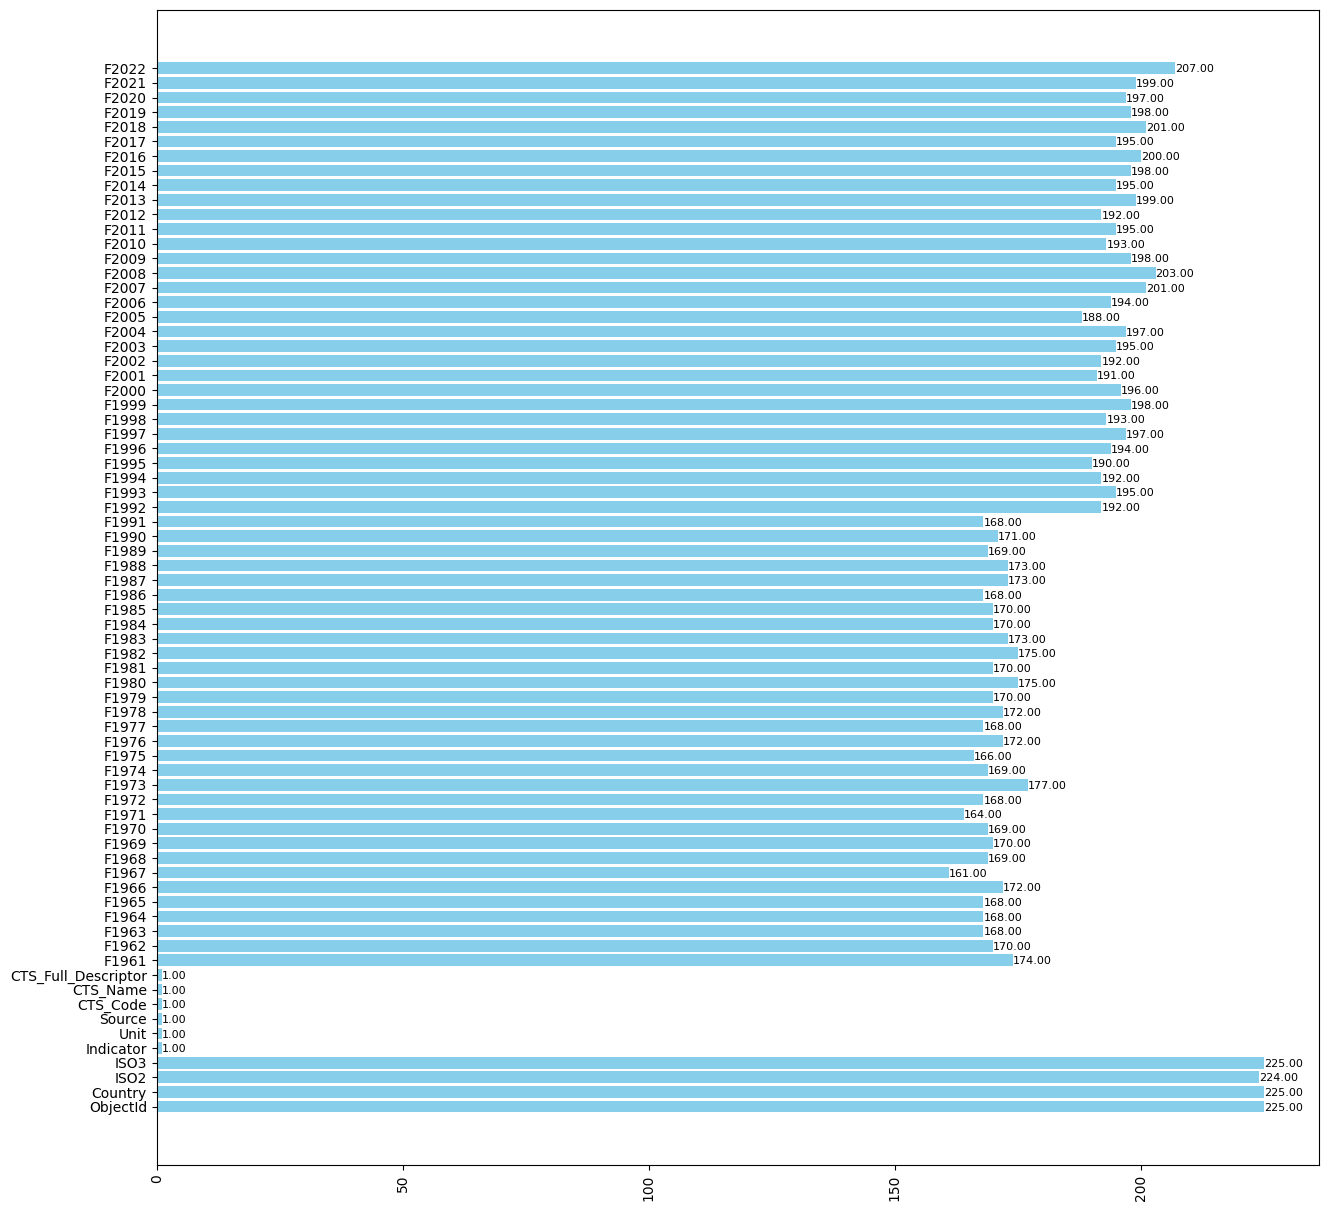

In [365]:
feature_unique_ASTC_cnts = cnt_feature_unival(ASTC, ASTC_columns)
plot_cnt_feature_unival(feature_unique_ASTC_cnts, ASTC_columns)

### **DROP FEATURES**

In [366]:
dropped_features = []

# ObjectId has 255 unique_value/255 records
dropped_features.append('ObjectId')
# dropped_features.append('Country')

# ISO2 and ISO3 are the aliases of Country
dropped_features.append('ISO2')
dropped_features.append('ISO3')

# Unit, Source, CTS_Code, CTS_Name, CTS_Full_Descriptor has only 1 unique value
dropped_features += ['Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Indicator']
dropped_features

['ObjectId',
 'ISO2',
 'ISO3',
 'Unit',
 'Source',
 'CTS_Code',
 'CTS_Name',
 'CTS_Full_Descriptor',
 'Indicator']

In [367]:
ASTC.drop(dropped_features, axis=1, inplace=True)

### **INSPECT FEATURES**

#### COUNTRY RECORDS IN THE SAME TERRITORY

In [368]:
# There are some records having same 'Country' but in different provinces
same_territory_countries = ['China', 'Congo', 'Korea', 'United States', 'Dominica']

# Plot them to see if each provinces of that Country having different SURFACE TEMPERATURE
plot_country_records(ASTC, same_territory_countries, tem_in_years)

### **EDA**

#### EDA ALL COUNTRY

In [369]:
plot_all_records(ASTC, tem_in_years, title='ANNUAL SURFACE TEMPERATURE CHANGE', getTrace=0)

#### EDA BY REGION

In [370]:
eda_by_region(ASTC, tem_in_years)

### **FEATURE ENGINEERING**

#### FILLING MISSING VALUE

In [371]:
# BASE ON THE VISUALIZATION OF EACH REGION - WE CONCLUDE THAT
# EACH COUNTRY IN THE SAME REGION SHOW THE APPROXIMATELY THE SAME SURFACE TEMPERATURE (NOT ALWAYS RIGHT)
# FILLING MISSING VALUE OF THE COUNTRY BY USING RECORDS IN THE SAME REGION
# FOR THOSE COUNTRIES IN THE SAME TERRITORIES, FILL FILLING MISSING VALUE OF THE COUNTRY BY USING RECORDS IN THE SAME TERRITORY (Section INSPECT FEATURES)

In [372]:
# filling missing in territories
ASTC = fill_region_missing_records(ASTC, tem_in_years, same_territory_countries, isTerritory=1)

# Filling missing region
for region in regions:
    ASTC = fill_region_missing_records(ASTC, tem_in_years, region, isTerritory=0)

Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 1
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 33
Missing Value After: 0
----------
Missing Value Before: 138
Missing Value After: 0
----------
Missing Value Before: 6
Missing Value After: 0
----------
Missing Value Before: 150
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 6
Missing Value After: 0
----------
Missing Value Before: 43
Missing Value After: 0
----------
Missing Value Before: 26
Missing Value After: 0
----------
Missing Value Before: 41
Missing Value After: 0
----------
Missing Value Before: 13
Missing Value After: 0
----------
Missing Value Before: 31
Missing Value After: 0
----------
Miss

In [373]:
print(f'Current missing value in ASTC is {ASTC.isnull().sum().sum()}')

Current missing value in ASTC is 0


## **CHANGE IN MEAN SEA LEVEL**

### **EXPLORING DATASET**

In [374]:
CIMSL.describe()

,ObjectId,ISO2,Value
count,35604.000000,0.0,35604.000000
mean,17802.500000,NaN,25.983479
std,10278.133829,NaN,62.781917
min,1.000000,NaN,-401.850000
25%,8901.750000,NaN,-8.552500
50%,17802.500000,NaN,23.095000
75%,26703.250000,NaN,58.480000
max,35604.000000,NaN,504.950000


In [375]:
CIMSL.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27


In [376]:
CIMSL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             35604 non-null  int64  
 1   Country              35604 non-null  object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 35604 non-null  object 
 4   Indicator            35604 non-null  object 
 5   Unit                 35604 non-null  object 
 6   Source               35604 non-null  object 
 7   CTS_Code             35604 non-null  object 
 8   CTS_Name             35604 non-null  object 
 9   CTS_Full_Descriptor  35604 non-null  object 
 10  Measure              35604 non-null  object 
 11  Date                 35604 non-null  object 
 12  Value                35604 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.5+ MB


In [377]:
CIMSL_columns = CIMSL.columns

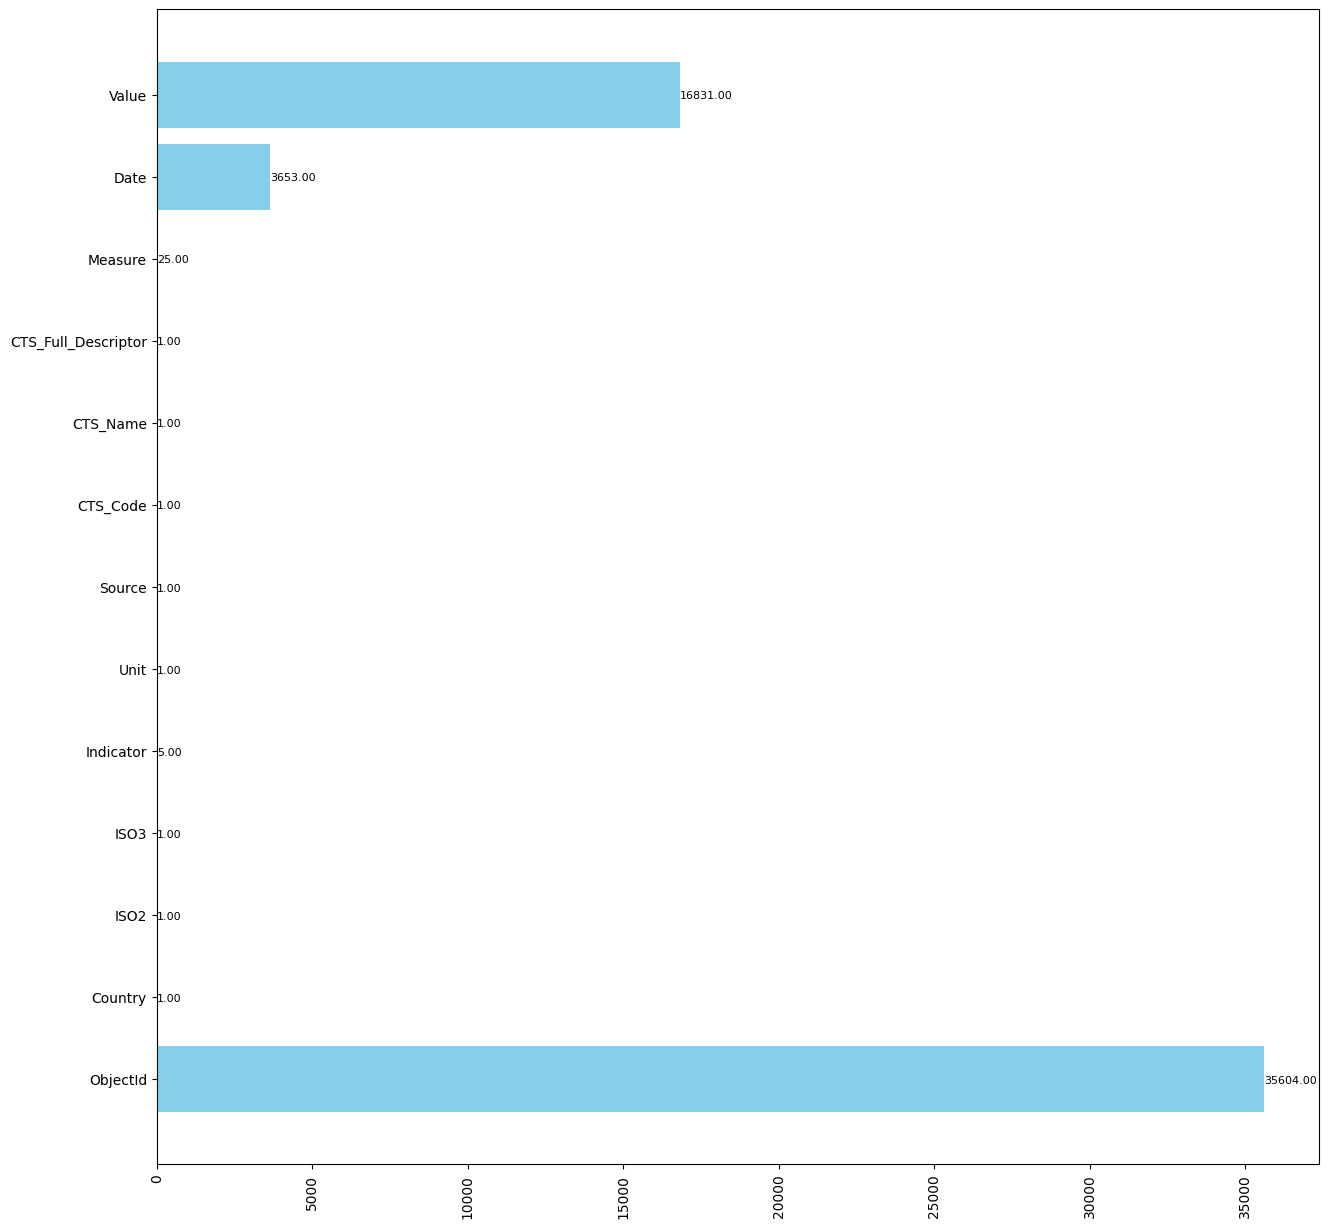

In [378]:
feature_unique_CIMSL_cnts = cnt_feature_unival(CIMSL, CIMSL_columns)
plot_cnt_feature_unival(feature_unique_CIMSL_cnts, CIMSL_columns)

### **DROP FEATURES**

In [379]:
dropped_features = []

# ObjectId has 35604 unique_value/35604 records
dropped_features.append('ObjectId')
dropped_features.append('Country')

# ISO2 and ISO3 are the aliases of Country
dropped_features.append('ISO2')
dropped_features.append('ISO3')

# Unit, Source, CTS_Code, CTS_Name, CTS_Full_Descriptor has only 1 unique value
dropped_features += ['Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Indicator']
dropped_features

['ObjectId',
 'Country',
 'ISO2',
 'ISO3',
 'Unit',
 'Source',
 'CTS_Code',
 'CTS_Name',
 'CTS_Full_Descriptor',
 'Indicator']

In [380]:
CIMSL.drop(dropped_features, axis=1, inplace=True)

### **EDA**

In [381]:
CIMSL_measures_list = CIMSL['Measure'].unique()
plot_measure_records(CIMSL, CIMSL_measures_list)

### **FEATURE ENGINEERING**

### CONVERT TO DATETIME

In [382]:
CIMSL['Date'] = CIMSL['Date'].apply(lambda x: x[1:]).apply(convertDatetime)
CIMSL['Date']

0       1992-12-17
1       1992-12-17
2       1992-12-17
3       1992-12-17
4       1992-12-17
           ...    
35599   2022-11-08
35600   2022-11-08
35601   2022-11-08
35602   2022-11-08
35603   2022-11-08
Name: Date, Length: 35604, dtype: datetime64[ns]

## **CLIMATE RELATED DISASTERS FREQUENCY**

### **EXPLORING DATASET**

In [383]:
disaster_in_years = []
for num in range(1980, 2023):
    disaster_in_years.append(f'F{num}')
disaster_in_years

['F1980',
 'F1981',
 'F1982',
 'F1983',
 'F1984',
 'F1985',
 'F1986',
 'F1987',
 'F1988',
 'F1989',
 'F1990',
 'F1991',
 'F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022']

In [384]:
CRDF.describe()

,ObjectId,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,970.000000,139.000000,141.000000,125.000000,178.000000,132.000000,143.000000,131.000000,182.000000,182.000000,...,258.000000,240.000000,305.000000,256.000000,299.000000,290.000000,300.000000,310.000000,315.000000,298.000000
mean,485.500000,1.496403,1.588652,1.920000,1.764045,1.772727,1.818182,1.847328,1.769231,1.879121,...,2.294574,2.416667,2.321311,2.296875,2.107023,1.979310,2.406667,2.406452,2.482540,2.328859
std,280.159181,1.315317,1.459310,2.119799,1.533229,1.822635,1.970331,1.680079,1.695473,2.513324,...,3.441344,3.290873,3.349446,3.241543,2.826395,2.517672,2.451119,3.016024,3.696553,2.741238
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,243.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,485.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,727.750000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000
max,970.000000,10.000000,12.000000,13.000000,10.000000,14.000000,15.000000,10.000000,12.000000,22.000000,...,34.000000,33.000000,31.000000,30.000000,26.000000,23.000000,20.000000,26.000000,43.000000,25.000000


In [385]:
CRDF.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [386]:
CRDF.shape

(970, 53)

In [387]:
CRDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             970 non-null    int64  
 1   Country              970 non-null    object 
 2   ISO2                 944 non-null    object 
 3   ISO3                 970 non-null    object 
 4   Indicator            970 non-null    object 
 5   Unit                 970 non-null    object 
 6   Source               970 non-null    object 
 7   CTS_Code             970 non-null    object 
 8   CTS_Name             970 non-null    object 
 9   CTS_Full_Descriptor  970 non-null    object 
 10  F1980                139 non-null    float64
 11  F1981                141 non-null    float64
 12  F1982                125 non-null    float64
 13  F1983                178 non-null    float64
 14  F1984                132 non-null    float64
 15  F1985                143 non-null    flo

In [388]:
CRDF_columns = CRDF.columns

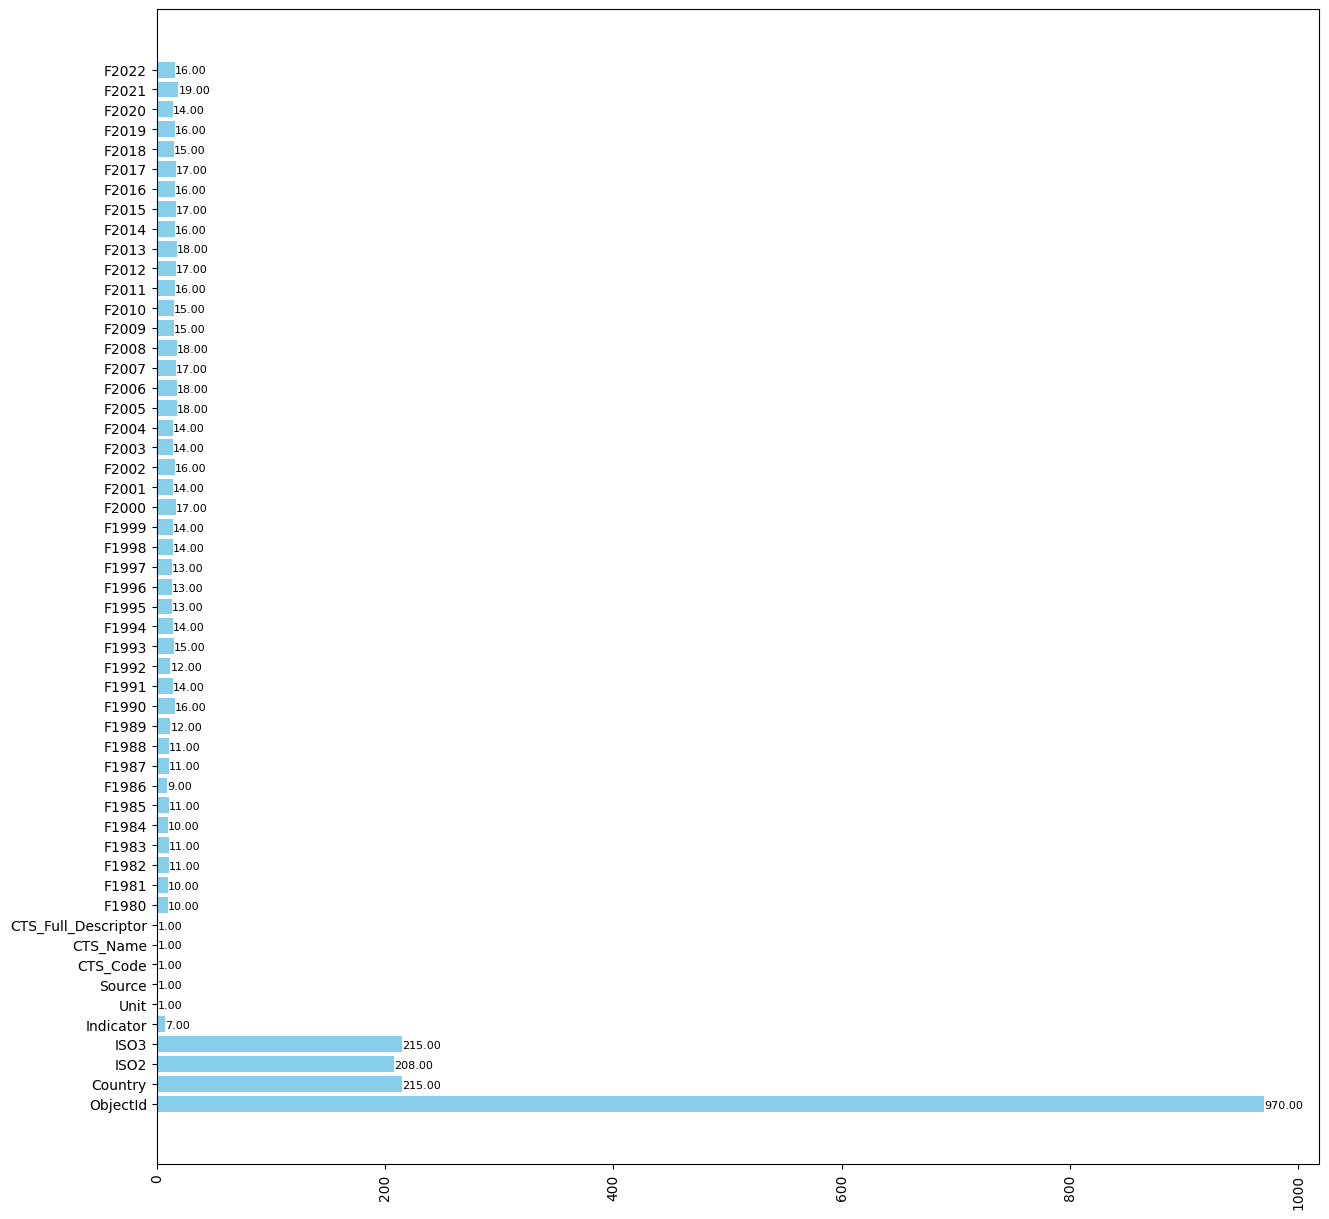

In [389]:
feature_unique_CRDF_cnts = cnt_feature_unival(CRDF, CRDF_columns)
plot_cnt_feature_unival(feature_unique_CRDF_cnts, CRDF_columns)

### **DROP FEATURES**

In [390]:
dropped_features = []

# ObjectId has 255 unique_value/255 records
dropped_features.append('ObjectId')
# dropped_features.append('Country')

# ISO2 and ISO3 are the aliases of Country
dropped_features.append('ISO2')
dropped_features.append('ISO3')

# Unit, Source, CTS_Code, CTS_Name, CTS_Full_Descriptor has only 1 unique value
dropped_features += ['Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
dropped_features

['ObjectId',
 'ISO2',
 'ISO3',
 'Unit',
 'Source',
 'CTS_Code',
 'CTS_Name',
 'CTS_Full_Descriptor']

In [391]:
CRDF.drop(dropped_features, axis=1, inplace=True)

### **INSPECT FEATURES**

#### INSPECT INDICATOR

In [392]:
CRDF['Indicator'].unique()

array(['Climate related disasters frequency, Number of Disasters: Drought',
       'Climate related disasters frequency, Number of Disasters: Extreme temperature',
       'Climate related disasters frequency, Number of Disasters: Flood',
       'Climate related disasters frequency, Number of Disasters: Landslide',
       'Climate related disasters frequency, Number of Disasters: Storm',
       'Climate related disasters frequency, Number of Disasters: TOTAL',
       'Climate related disasters frequency, Number of Disasters: Wildfire'],
      dtype=object)

In [393]:
def preprocssingIndicator(text):
    pattern = r'Climate related disasters frequency, Number of Disasters: '
    repl = ''
    text = re.sub(pattern, repl, text)
    return text

In [394]:
# Preprocessing Indicator
CRDF['Indicator'] = CRDF['Indicator'].apply(preprocssingIndicator)
CRDF['Indicator'].unique()

array(['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm',
       'TOTAL', 'Wildfire'], dtype=object)

#### INSPECT NAN VALUES

In [395]:
# NaN value represent at that timeline, there is no disaster --> Fill with 0

### **FILLING MISSING VALUE**

In [396]:
CRDF.fillna(0, inplace=True)
CRDF.isnull().sum()

Country      0
Indicator    0
F1980        0
F1981        0
F1982        0
F1983        0
F1984        0
F1985        0
F1986        0
F1987        0
F1988        0
F1989        0
F1990        0
F1991        0
F1992        0
F1993        0
F1994        0
F1995        0
F1996        0
F1997        0
F1998        0
F1999        0
F2000        0
F2001        0
F2002        0
F2003        0
F2004        0
F2005        0
F2006        0
F2007        0
F2008        0
F2009        0
F2010        0
F2011        0
F2012        0
F2013        0
F2014        0
F2015        0
F2016        0
F2017        0
F2018        0
F2019        0
F2020        0
F2021        0
F2022        0
dtype: int64

### **EDA**

#### **VISUAL BY INDICATOR**

TOTAL

In [397]:
combineIndicatorPlot(CRDF, 'TOTAL', name_regions, regions, disaster_in_years, 'TOTAL disasters frequency Records')

## **FOREST AND CARBON**

### **EXPLORING DATASET**

In [398]:
forest_carbon_in_years = []
for num in range(1992, 2021):
    forest_carbon_in_years.append(f'F{num}')
forest_carbon_in_years

['F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020']

In [399]:
FAC_columns = FAC.columns

In [400]:
FAC.describe()

,ObjectId,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1992,F1993,F1994,F1995,F1996,F1997,...,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
count,1353.000000,0.0,0.0,0.0,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,...,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03,1.341000e+03
mean,677.000000,NaN,NaN,NaN,6.147286e+04,6.169286e+04,6.166406e+04,6.163804e+04,6.161296e+04,6.160859e+04,...,6.198066e+04,6.240220e+04,6.239067e+04,6.237938e+04,6.236917e+04,6.236599e+04,6.234179e+04,6.232847e+04,6.231346e+04,6.229886e+04
std,390.721768,NaN,NaN,NaN,5.572969e+05,5.593477e+05,5.591997e+05,5.590844e+05,5.589811e+05,5.591226e+05,...,5.614293e+05,5.659129e+05,5.658572e+05,5.658062e+05,5.657683e+05,5.657677e+05,5.656636e+05,5.656154e+05,5.655614e+05,5.655088e+05
min,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,339.000000,NaN,NaN,NaN,4.982200e+01,5.068406e+01,4.997000e+01,5.093506e+01,5.090010e+01,5.057439e+01,...,5.166647e+01,5.123320e+01,5.089000e+01,5.093506e+01,4.976106e+01,4.977270e+01,4.978434e+01,5.004000e+01,5.025596e+01,5.007964e+01
50%,677.000000,NaN,NaN,NaN,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000816e+02,1.000331e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,1015.000000,NaN,NaN,NaN,1.385512e+03,1.380253e+03,1.374923e+03,1.369593e+03,1.364264e+03,1.359528e+03,...,1.435126e+03,1.430506e+03,1.425887e+03,1.421267e+03,1.416648e+03,1.409545e+03,1.402443e+03,1.395340e+03,1.407907e+03,1.424789e+03
max,1353.000000,NaN,NaN,NaN,1.299094e+07,1.299057e+07,1.298936e+07,1.298906e+07,1.298901e+07,1.299595e+07,...,1.301345e+07,1.302585e+07,1.302568e+07,1.302561e+07,1.302598e+07,1.302696e+07,1.302623e+07,1.302630e+07,1.302629e+07,1.302624e+07


In [401]:
FAC.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
0,1,Advanced Economies,NaN,AETMP,Carbon stocks in forests,Million tonnes,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,...,5.644555e+04,5.666865e+04,5.689175e+04,5.711485e+04,5.733795e+04,5.756817e+04,5.777785e+04,5.795976e+04,5.803505e+04,5.810255e+04
1,2,Advanced Economies,NaN,AETMP,Forest area,1000 HA,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,...,9.563385e+05,9.574984e+05,9.586583e+05,9.598182e+05,9.609781e+05,9.620138e+05,9.618451e+05,9.619637e+05,9.621006e+05,9.622522e+05
2,3,Advanced Economies,NaN,AETMP,Index of carbon stocks in forests,Index,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,...,1.072729e+02,1.076969e+02,1.081209e+02,1.085449e+02,1.089688e+02,1.094064e+02,1.098049e+02,1.101506e+02,1.102937e+02,1.104220e+02
3,4,Advanced Economies,NaN,AETMP,Index of forest extent,Index,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,...,1.011099e+02,1.012325e+02,1.013552e+02,1.014778e+02,1.016004e+02,1.017099e+02,1.016921e+02,1.017046e+02,1.017191e+02,1.017351e+02
4,5,Advanced Economies,NaN,AETMP,Land area,1000 HA,Food and Agriculture Organization of the Unite...,NaN,NaN,NaN,...,2.991126e+06,2.991136e+06,2.991273e+06,2.991271e+06,2.991273e+06,2.992294e+06,2.992224e+06,2.992281e+06,2.992286e+06,2.992206e+06


In [402]:
FAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             1353 non-null   int64  
 1   Country              1353 non-null   object 
 2   ISO2                 1289 non-null   object 
 3   ISO3                 1353 non-null   object 
 4   Indicator            1353 non-null   object 
 5   Unit                 1353 non-null   object 
 6   Source               1353 non-null   object 
 7   CTS_Code             0 non-null      float64
 8   CTS_Name             0 non-null      float64
 9   CTS_Full_Descriptor  0 non-null      float64
 10  F1992                1353 non-null   float64
 11  F1993                1353 non-null   float64
 12  F1994                1353 non-null   float64
 13  F1995                1353 non-null   float64
 14  F1996                1353 non-null   float64
 15  F1997                1353 non-null   f

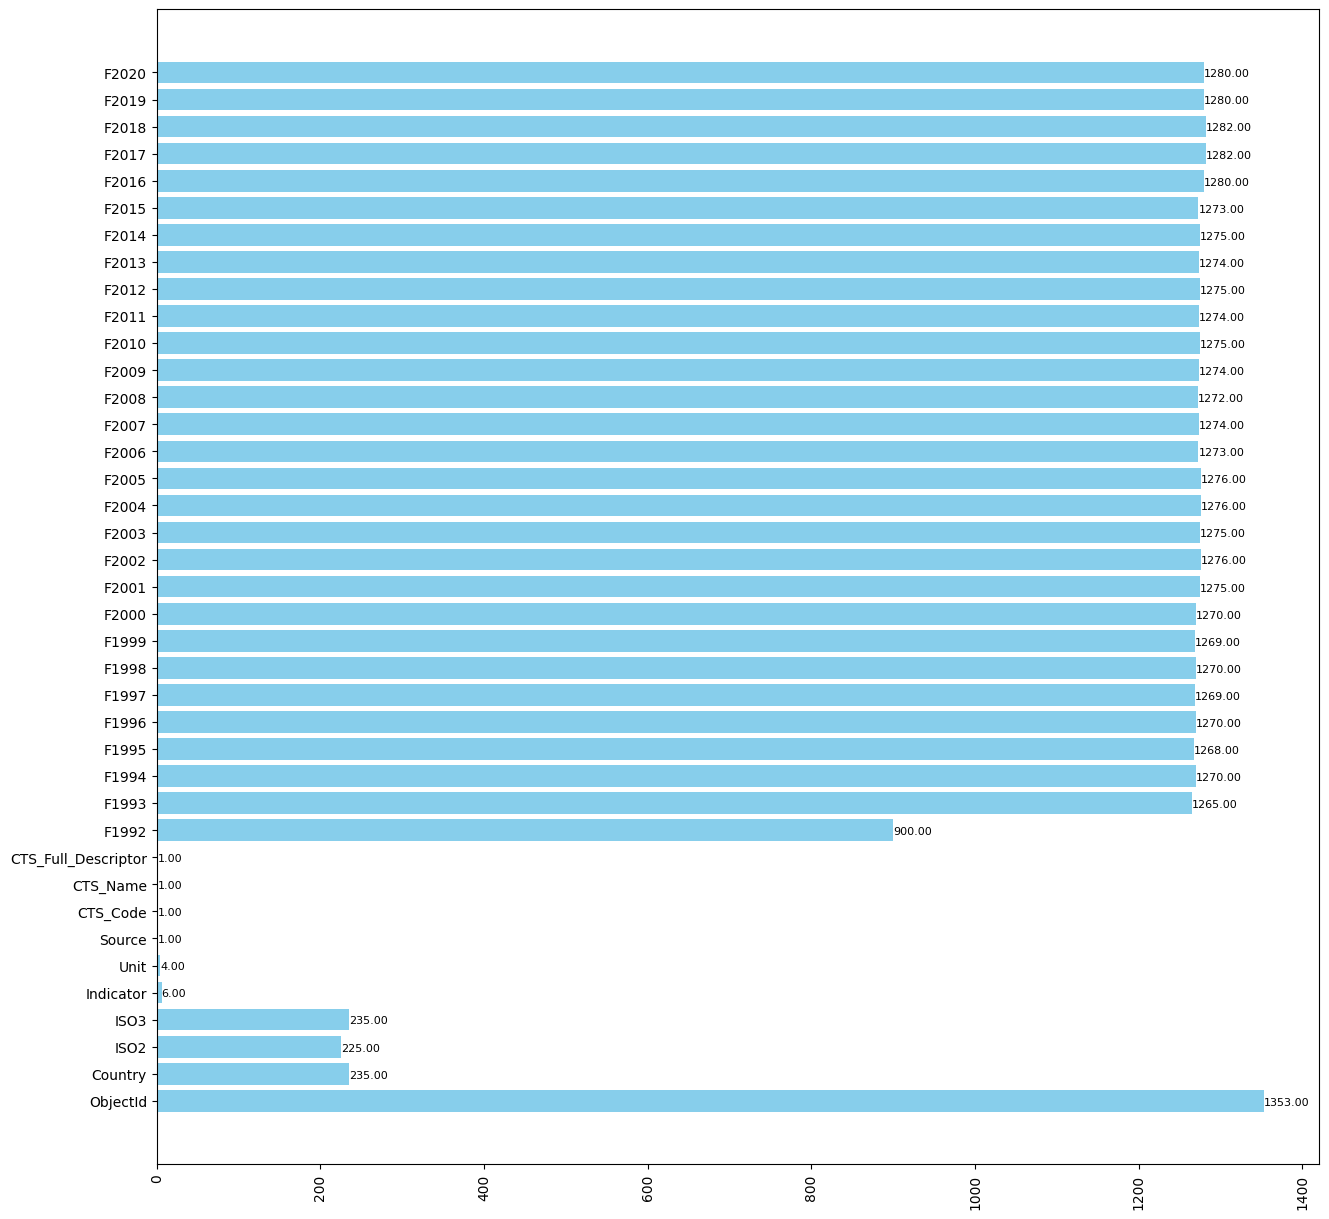

In [403]:
feature_unique_FAC_cnts = cnt_feature_unival(FAC, FAC_columns)
plot_cnt_feature_unival(feature_unique_FAC_cnts, FAC_columns)

### **DROP FEATURES**

In [404]:
dropped_features = []

# ObjectId has 255 unique_value/255 records
dropped_features.append('ObjectId')
# dropped_features.append('Country')

# ISO2 and ISO3 are the aliases of Country
dropped_features.append('ISO2')
dropped_features.append('ISO3')

# Unit is just a unit for corresponding indicator
dropped_features.append('Unit')

# Unit, Source, CTS_Code, CTS_Name, CTS_Full_Descriptor has only 1 unique value
dropped_features += ['Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']
dropped_features

['ObjectId',
 'ISO2',
 'ISO3',
 'Unit',
 'Source',
 'CTS_Code',
 'CTS_Name',
 'CTS_Full_Descriptor']

In [405]:
FAC.drop(dropped_features, axis=1, inplace=True)

### **INSPECT FEATURES**

#### INSPECT INDICATOR

In [406]:
FAC['Indicator'].unique()

array(['Carbon stocks in forests', 'Forest area',
       'Index of carbon stocks in forests', 'Index of forest extent',
       'Land area', 'Share of forest area'], dtype=object)

In [407]:
FAC['Country'].unique()

array(['Advanced Economies', 'Afghanistan, Islamic Rep. of', 'Africa',
       'Albania', 'Algeria', 'American Samoa', 'Americas',
       'Andorra, Principality of', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia, Rep. of',
       'Aruba, Kingdom of the Netherlands', 'Asia', 'Australia',
       'Austria', 'Azerbaijan, Rep. of', 'Bahamas, The',
       'Bahrain, Kingdom of', 'Bangladesh', 'Barbados',
       'Belarus, Rep. of', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Rep.',
       'Chad', 'Channel Islands', 'Chile', 'China, P.R.: Mainland',
       'Colombia', 'Comoros, Union of the', 'Congo, Dem. Rep. of the',
       'Congo, Rep. of', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia, Rep

In [408]:
indicator_cbs = 'Carbon stocks in forests'
indicator_fa = 'Forest area'
indicator_idx_cbs = 'Index of carbon stocks in forests'
indicator_idx_fe = 'Index of forest extent'
indicator_la = 'Land area'
indicator_sfa = 'Share of forest area'

In [409]:
# "Index of carbon stocks in forests" is the scale of "Carbon stocks in forests"
# "Index of forest extent" is the scale of the increasement in 'Forest area'
# "Share of forest area" is the combination of two categories 'Forest area' and 'Land area'
# ---> Dropppppp

# FAC = FAC[~FAC['Indicator'].isin([indicator_fa, indicator_cbs, indicator_la])]
# FAC = FAC.reset_index().drop('index', axis=1)
# FAC.head()

#### INSPECT NAN VALUES

In [410]:
FAC.isnull().sum()

Country       0
Indicator     0
F1992         0
F1993         0
F1994         0
F1995         0
F1996         0
F1997         0
F1998         0
F1999         0
F2000         0
F2001         0
F2002         0
F2003         0
F2004         0
F2005         0
F2006         6
F2007         6
F2008         6
F2009         6
F2010         6
F2011        12
F2012        12
F2013        12
F2014        12
F2015        12
F2016        12
F2017        12
F2018        12
F2019        12
F2020        12
dtype: int64

### **FILLING MISSING VALUE**

In [411]:
# Filling null records of a country using KNN Imputer
# Using the value of which countries having in the same regions/territories with the country need to fill
for Indicator in FAC['Indicator'].unique():
    # filling missing in territories
    FAC = fill_region_missing_records(FAC, forest_carbon_in_years, same_territory_countries, isTerritory=1, Indicator=Indicator)

    # Filling missing region
    for region in regions:
        FAC = fill_region_missing_records(FAC, forest_carbon_in_years, region, isTerritory=0, Indicator=Indicator)

Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value Before: 0
Missing Value After: 0
----------
Missing Value 

### **EDA**

#### **VISUAL BY INDICATOR**

Share of forest area

In [412]:
combineIndicatorPlot(FAC, indicator_sfa, name_regions, regions, forest_carbon_in_years, 'SHARE OF FOREST AREA')

# **QUESTION 2**

## **OVERALL DEFINITION**

In [413]:
'''
national_data {
    Country: {
        temperature: Dataframe,
        carbon_stock: Dataframe,
        forest_area: Dataframe,
        disaster: {
            indicator_1: Dataframe,
            indicator_2: Dataframe,
            .
            .
            .
            indicator_n: Dataframe
        }
    }
}

'''
national_data = {}
FAC_countries = set(FAC['Country'].values)
ASTC_countries = set(ASTC['Country'].values)
CRDF_countries = set(CRDF['Country'].values)

# Get the list_countries that exist in all 3 dataframe
list_countries = FAC_countries & ASTC_countries & CRDF_countries

# Get timeline that exist in all 3 dataframe
timeline = set(tem_in_years) & set(disaster_in_years) & set(forest_carbon_in_years)

list_countries = list(set(list_countries))
timeline = sorted(timeline)

len(list_countries), len(timeline)

(196, 29)

In [414]:
timeline

['F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020']

In [415]:
# Initialize the country items in national_data
for country in list_countries:
    national_data[country] = {
        'temperature': None,
        'carbon_stock': None,
        'forest_area': None,
        'disaster': {
            'Drought': None,
            'Extreme temperature': None,
            'Flood': None,
            'Landslide': None,
            'Storm': None,
            'TOTAL': None,
            'Wildfire': None
        }
    }

## **PROCESSING**

### **TEMPERATURE**

In [416]:
for country in list_countries:
    data = ASTC[ASTC['Country']==country][timeline].values.flatten()
    national_data[country]['temperature'] = data

### **CARBON STOCK**

In [417]:
for country in list_countries:
    data = FAC[(FAC['Country']==country) & (FAC['Indicator']==indicator_cbs)][timeline].values.flatten()
    national_data[country]['carbon_stock'] = data

### **FOREST AREA**

In [418]:
for country in list_countries:
    data = FAC[(FAC['Country']==country) & (FAC['Indicator']==indicator_fa)][timeline].values.flatten()
    national_data[country]['forest_area'] = data

### **DISASTER**

In [419]:
disaster_type = CRDF['Indicator'].unique()
for disaster in disaster_type:
    for country in list_countries:
        data = CRDF[(CRDF['Country']==country) & (CRDF['Indicator']==disaster)][timeline].values.flatten()
        national_data[country]['disaster'][disaster] = data



---



# **QUESTION 3**

## **DEFINE FUNCTION**

### **CALCULATE THE MEAN OF A FACTOR OF REGION VIA TIMELINE**

In [420]:
def mean_of_factor(region, factor, disaster_type='Flood'):
    '''
        Want to take the mean of disaster of country, must pass the <disaster_type> in to function
        <disaster_type> default value is 'Flood'
    '''
    mean_of_countries = []
    for country in region:
        if country in national_data.keys():
            value = national_data[country][factor]
            if factor == 'disaster':
                value = value[disaster_type]

            mean_of_countries.append(value)

    return np.mean(mean_of_countries, axis=0)

## **INTERACTION OF FOREST_AREA ON TEMPERATURE, CARBON STOCK, DISASTER FREQUENCY**

In [421]:
# East_Asia
ea_forest_area = mean_of_factor(East_Asia, 'forest_area')
ea_temperature = mean_of_factor(East_Asia, 'temperature')
ea_carbon_stock = mean_of_factor(East_Asia, 'carbon_stock')
ea_disaster_total = mean_of_factor(East_Asia, 'disaster', 'TOTAL')

# Southeast_Asia
sa_forest_area = mean_of_factor(Southeast_Asia, 'forest_area')
sa_temperature = mean_of_factor(Southeast_Asia, 'temperature')
sa_carbon_stock = mean_of_factor(Southeast_Asia, 'carbon_stock')
sa_disaster_total = mean_of_factor(Southeast_Asia, 'disaster', 'TOTAL')

In [422]:
import statsmodels.api as sm

### **EAST ASIA**



---



In [423]:
scaler = StandardScaler()
ea_forest_area = scaler.fit_transform(np.array(ea_forest_area).reshape(-1, 1))
ea_temperature = scaler.fit_transform(np.array(ea_temperature).reshape(-1, 1))
ea_carbon_stock = scaler.fit_transform(np.array(ea_carbon_stock).reshape(-1, 1))
ea_disaster_total = scaler.fit_transform(np.array(ea_disaster_total).reshape(-1, 1))

**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON TEMPERATURE**

In [424]:
ea_fe_tem_testing_data = {
    'ea_forest_area': ea_forest_area.flatten(),
    'ea_temperature': ea_temperature.flatten()
}
ea_fe_tem_testing_df = pd.DataFrame(ea_fe_tem_testing_data)
ea_fe_tem_testing_df.head()

,ea_forest_area,ea_temperature
0,-1.635961,-1.114630
1,-1.527995,-1.731210
2,-1.420029,0.280218
3,-1.312063,-0.816239
4,-1.204097,-2.020644


In [425]:
X_train_lm = sm.add_constant(ea_forest_area)
lm = sm.OLS(ea_temperature, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     8.422
Date:                Sat, 25 May 2024   Prob (F-statistic):            0.00730
Time:                        15:51:53   Log-Likelihood:                -37.213
No. Observations:                  29   AIC:                             78.43
Df Residuals:                      27   BIC:                             81.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.83e-17      0.168   2.87e-16      1.0

Linear Regression Model: `ea_temperature = x1 * ea_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

With the 95% confidence level, we reject H0 (0.007 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0


> Forest_Area factor linearly affects Temperature factor







---



**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON CARBON_STOCK**

In [426]:
X_train_lm = sm.add_constant(ea_forest_area)
lm = sm.OLS(ea_carbon_stock, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1371.
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.11e-24
Time:                        15:51:53   Log-Likelihood:                 16.077
No. Observations:                  29   AIC:                            -28.15
Df Residuals:                      27   BIC:                            -25.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.626e-16      0.027  -6.08e-15      1.0

Linear Regression Model: `ea_carbon_stock = x1 * ea_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

With the 95% confidence level, we reject H0 (0 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0


> Forest_Area factor linearly affects Carbon_stock factor







---



**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON DISASTER FREQUENCY**

In [427]:
X_train_lm = sm.add_constant(ea_forest_area)
lm = sm.OLS(ea_disaster_total, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     9.236
Date:                Sat, 25 May 2024   Prob (F-statistic):            0.00522
Time:                        15:51:53   Log-Likelihood:                -36.883
No. Observations:                  29   AIC:                             77.77
Df Residuals:                      27   BIC:                             80.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.58e-17      0.166  -4.56e-16      1.0

Linear Regression Model: `ea_disaster_total = x1 * ea_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

With the 95% confidence level, we reject H0 (0.005 > 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0


> Forest_Area factor having linear effect on Disaster Frequency factor





### **SOUTH EAST ASIA**



---



In [428]:
scaler = StandardScaler()
sa_forest_area = scaler.fit_transform(np.array(sa_forest_area).reshape(-1, 1))
sa_temperature = scaler.fit_transform(np.array(sa_temperature).reshape(-1, 1))
sa_carbon_stock = scaler.fit_transform(np.array(sa_carbon_stock).reshape(-1, 1))
sa_disaster_total = scaler.fit_transform(np.array(sa_disaster_total).reshape(-1, 1))

**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON TEMPERATURE**

In [429]:
X_train_lm = sm.add_constant(sa_forest_area)
lm = sm.OLS(sa_temperature, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     31.13
Date:                Sat, 25 May 2024   Prob (F-statistic):           6.44e-06
Time:                        15:51:53   Log-Likelihood:                -30.029
No. Observations:                  29   AIC:                             64.06
Df Residuals:                      27   BIC:                             66.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.736e-16      0.131  -2.85e-15      1.0

Linear Regression Model: `sa_temperature = x1 * sa_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

With the 95% confidence level, we reject H0 (0.000 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0


> Forest_Area factor linearly affects Temperature factor







---



**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON CARBON_STOCK**

In [430]:
X_train_lm = sm.add_constant(sa_forest_area)
lm = sm.OLS(sa_carbon_stock, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     967.1
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.11e-22
Time:                        15:51:53   Log-Likelihood:                 11.138
No. Observations:                  29   AIC:                            -18.28
Df Residuals:                      27   BIC:                            -15.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.738e-15      0.032  -1.49e-13      1.0

Linear Regression Model: `sa_carbon_stock = x1 * sa_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

With the 95% confidence level, we reject H0 (0 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0


> Forest_Area factor linearly affects Carbon_stock factor







---



**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON DISASTER FREQUENCY**

In [431]:
X_train_lm = sm.add_constant(sa_forest_area)
lm = sm.OLS(sa_disaster_total, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     21.02
Date:                Sat, 25 May 2024   Prob (F-statistic):           9.29e-05
Time:                        15:51:53   Log-Likelihood:                -32.800
No. Observations:                  29   AIC:                             69.60
Df Residuals:                      27   BIC:                             72.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.569e-16      0.144   1.78e-15      1.0

Linear Regression Model: `ea_disaster_total = x1 * ea_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

With the 95% confidence level, we do not reject H0 (0 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0


> Forest_Area factor linearly affect Disaster Frequency factor





## **LACK OF FIT TESTING**

### **EAST ASIA**



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON TEMPERATURE**

In [432]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
ea_fe_tem_testing_data = {
    'ea_forest_area': ea_forest_area.flatten(),
    'ea_temperature': ea_temperature.flatten()
}
ea_fe_tem_testing_df = pd.DataFrame(ea_fe_tem_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(ea_fe_tem_testing_df)
ro.globalenv['ea_fe_tem_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


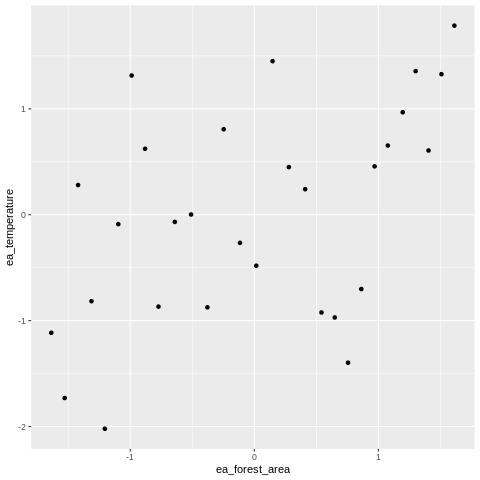

In [433]:
%%R
# Plot
library(ggplot2)
ggplot(ea_fe_tem_testing_df, aes(x=ea_forest_area, y=ea_temperature)) + geom_point()

In [434]:
%%R
#fit full model
full <- lm(ea_temperature ~ poly(ea_forest_area,2), data=ea_fe_tem_testing_df)
#fit reduced model
reduced <- lm(ea_temperature ~ ea_forest_area, data=ea_fe_tem_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df  Sum.of.Sq         F    Pr..F.
1     26 21.82717 NA         NA        NA        NA
2     27 22.10510 -1 -0.2779296 0.3310631 0.5699804


***Reduced model:***  `ea_temperature = b0 + b1*ea_forest_area`

***Full model:***  `ea_temperature = b0 + b1*ea_forest_area + b2*ea_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we do not reject H0 (0.5699804 > 0.05)*

> ***Reduced model offers a statistically better fit on data***

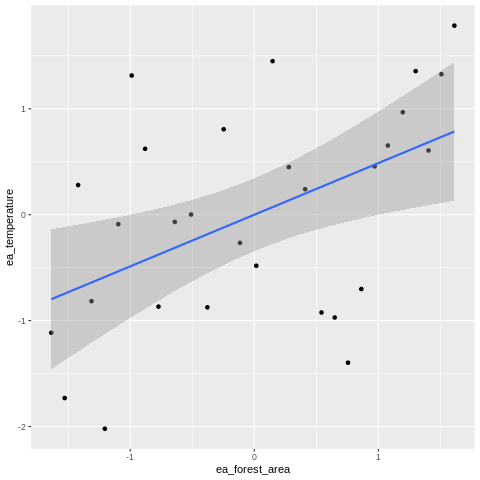

In [435]:
%%R
ggplot(ea_fe_tem_testing_df, aes(x=ea_forest_area, y=ea_temperature)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 1), size = 1) +
          xlab('ea_forest_area') +
          ylab('ea_temperature')



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON CARBON_STOCK**

In [436]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
ea_fe_carbon_stock_testing_data = {
    'ea_forest_area': ea_forest_area.flatten(),
    'ea_carbon_stock': ea_carbon_stock.flatten()
}
ea_fe_carbon_stock_testing_df = pd.DataFrame(ea_fe_carbon_stock_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(ea_fe_carbon_stock_testing_df)
ro.globalenv['ea_fe_carbon_stock_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


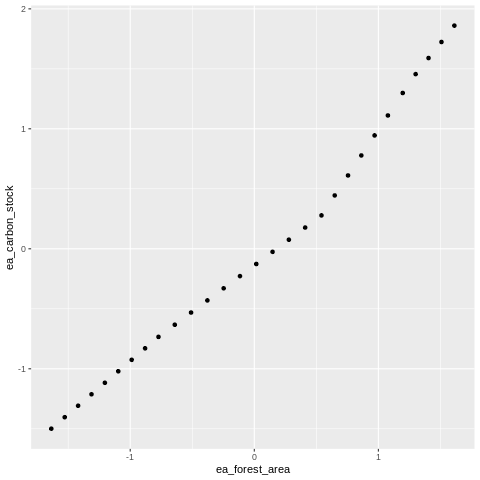

In [437]:
%%R
# Plot
library(ggplot2)
ggplot(ea_fe_carbon_stock_testing_df, aes(x=ea_forest_area, y=ea_carbon_stock)) + geom_point()

In [438]:
%%R
#fit full model
full <- lm(ea_carbon_stock ~ poly(ea_forest_area, 2), data=ea_fe_carbon_stock_testing_df)
#fit reduced model
reduced <- lm(ea_carbon_stock ~ ea_forest_area, data=ea_fe_carbon_stock_testing_df)
# Anova
anova(full, reduced)

  Res.Df       RSS Df  Sum.of.Sq       F       Pr..F.
1     26 0.1400331 NA         NA      NA           NA
2     27 0.5602628 -1 -0.4202297 78.0242 2.627868e-09


***Reduced model:***  `ea_carbon_stock = b0 + b1*ea_forest_area`

***Full model:***  `ea_carbon_stock = b0 + b1*ea_forest_area + b2*ea_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we reject H0 (2.66116e-14 < 0.05)*

> ***Full model offers a statistically better fit on data***

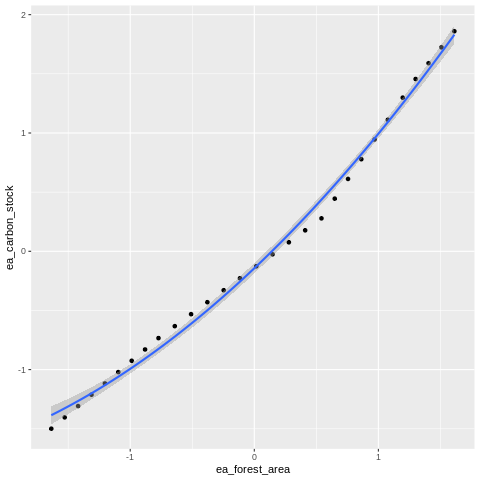

In [439]:
%%R
ggplot(ea_fe_carbon_stock_testing_df, aes(x=ea_forest_area, y=ea_carbon_stock)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 2), size = 1) +
          xlab('ea_forest_area') +
          ylab('ea_carbon_stock')



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON DISASTER FREQUENCY**

In [440]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
ea_fe_disaster_testing_data = {
    'ea_forest_area': ea_forest_area.flatten(),
    'ea_disaster_total': ea_disaster_total.flatten()
}
ea_fe_disaster_testing_df = pd.DataFrame(ea_fe_disaster_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(ea_fe_disaster_testing_df)
ro.globalenv['ea_fe_disaster_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


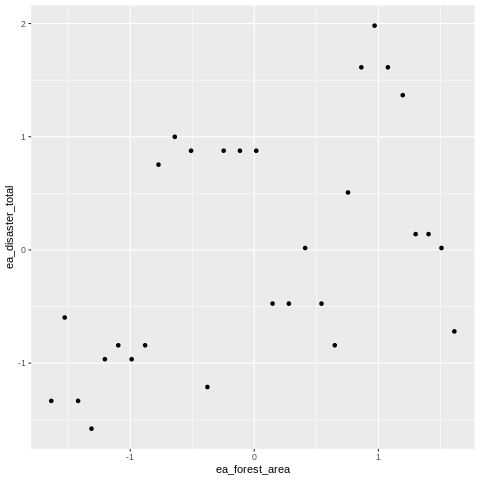

In [441]:
%%R
# Plot
library(ggplot2)
ggplot(ea_fe_disaster_testing_df, aes(x=ea_forest_area, y=ea_disaster_total)) + geom_point()

In [442]:
%%R
#fit full model
full <- lm(ea_disaster_total ~ poly(ea_forest_area, 2), data=ea_fe_disaster_testing_df)
#fit reduced model
reduced <- lm(ea_disaster_total ~ ea_forest_area, data=ea_fe_disaster_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df Sum.of.Sq        F     Pr..F.
1     26 18.67248 NA        NA       NA         NA
2     27 21.60807 -1 -2.935589 4.087583 0.05360326


***Reduced model:***  `ea_disaster_total = b0 + b1*ea_forest_area`

***Full model:***  `ea_disaster_total = b0 + b1*ea_forest_area + b2*ea_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we do not reject H0 (0.05360326 > 0.05)*

> ***Reduced model offers a statistically better fit on data***

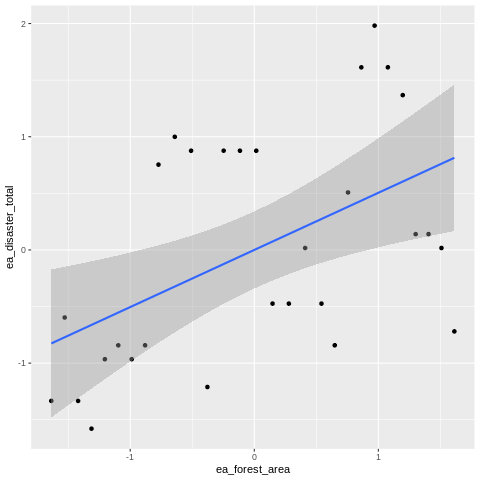

In [443]:
%%R
ggplot(ea_fe_disaster_testing_df, aes(x=ea_forest_area, y=ea_disaster_total)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 1), size = 1) +
          xlab('ea_forest_area') +
          ylab('ea_disaster_total')

### **SOUTH EAST ASIA**



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON TEMPERATURE**

In [444]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
sa_fe_tem_testing_data = {
    'sa_forest_area': sa_forest_area.flatten(),
    'sa_temperature': sa_temperature.flatten()
}
sa_fe_tem_testing_df = pd.DataFrame(sa_fe_tem_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(sa_fe_tem_testing_df)
ro.globalenv['sa_fe_tem_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


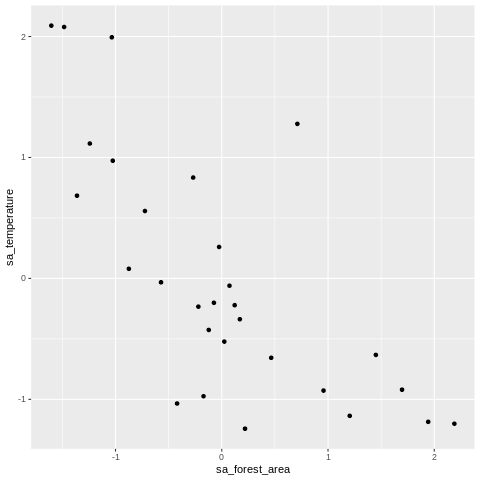

In [445]:
%%R
# Plot
library(ggplot2)
ggplot(sa_fe_tem_testing_df, aes(x=sa_forest_area, y=sa_temperature)) + geom_point()

In [446]:
%%R
#fit full model
full <- lm(sa_temperature ~ poly(sa_forest_area,2), data=sa_fe_tem_testing_df)
#fit reduced model
reduced <- lm(sa_temperature ~ sa_forest_area, data=sa_fe_tem_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df Sum.of.Sq        F     Pr..F.
1     26 10.93525 NA        NA       NA         NA
2     27 13.46879 -1 -2.533538 6.023819 0.02112313


***Reduced model:***  `sa_temperature = b0 + b1*sa_forest_area`

***Full model:***  `sa_temperature = b0 + b1*sa_forest_area + b2*sa_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we reject H0 (0.02112313 < 0.05)*

> ***Full model offers a statistically better fit on data***

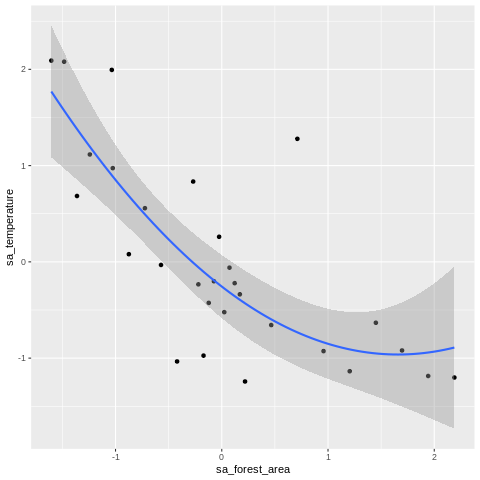

In [447]:
%%R
ggplot(sa_fe_tem_testing_df, aes(x=sa_forest_area, y=sa_temperature)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 2), size = 1) +
          xlab('sa_forest_area') +
          ylab('sa_temperature')



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON CARBON_STOCK**

In [448]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
sa_fe_carbon_stock_testing_data = {
    'sa_forest_area': sa_forest_area.flatten(),
    'sa_carbon_stock': sa_carbon_stock.flatten()
}
sa_fe_carbon_stock_testing_df = pd.DataFrame(sa_fe_carbon_stock_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(sa_fe_carbon_stock_testing_df)
ro.globalenv['sa_fe_carbon_stock_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


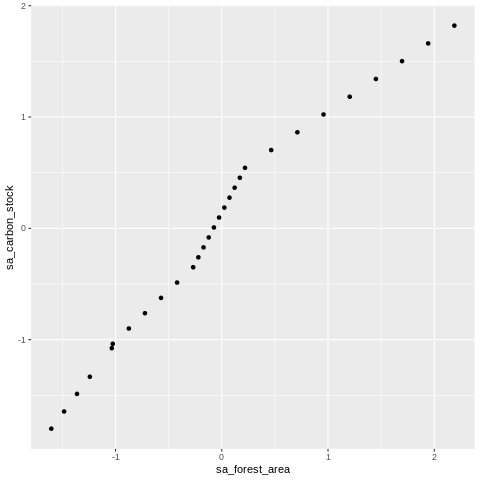

In [449]:
%%R
# Plot
library(ggplot2)
ggplot(sa_fe_carbon_stock_testing_df, aes(x=sa_forest_area, y=sa_carbon_stock)) + geom_point()

In [450]:
%%R
#fit full model
full <- lm(sa_carbon_stock ~ poly(sa_forest_area, 2), data=sa_fe_carbon_stock_testing_df)
#fit reduced model
reduced <- lm(sa_carbon_stock ~ sa_forest_area, data=sa_fe_carbon_stock_testing_df)
# Anova
anova(full, reduced)

  Res.Df       RSS Df  Sum.of.Sq        F      Pr..F.
1     26 0.2325553 NA         NA       NA          NA
2     27 0.7876545 -1 -0.5550992 62.06085 2.35749e-08


***Reduced model:***  `sa_carbon_stock = b0 + b1*sa_forest_area`

***Full model:***  `sa_carbon_stock = b0 + b1*sa_forest_area + b2*sa_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we reject H0 (2.35749e-08 < 0.05)*

> ***Full model offers a statistically better fit on data***

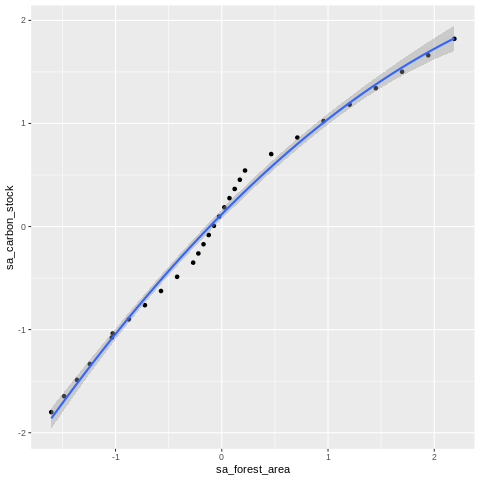

In [451]:
%%R
ggplot(sa_fe_carbon_stock_testing_df, aes(x=sa_forest_area, y=sa_carbon_stock)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 2), size = 1) +
          xlab('sa_forest_area') +
          ylab('sa_carbon_stock')



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON DISASTER FREQUENCY**

In [452]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
sa_fe_disaster_testing_data = {
    'sa_forest_area': sa_forest_area.flatten(),
    'sa_disaster_total': sa_disaster_total.flatten()
}
sa_fe_disaster_testing_df = pd.DataFrame(sa_fe_disaster_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(sa_fe_disaster_testing_df)
ro.globalenv['sa_fe_disaster_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


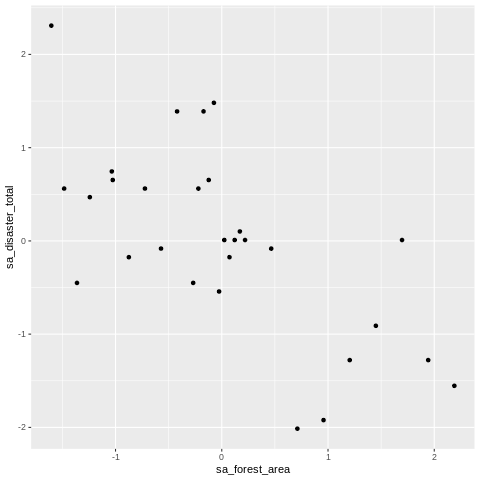

In [453]:
%%R
# Plot
library(ggplot2)
ggplot(sa_fe_disaster_testing_df, aes(x=sa_forest_area, y=sa_disaster_total)) + geom_point()

In [454]:
%%R
#fit full model
full <- lm(sa_disaster_total ~ poly(sa_forest_area, 2), data=sa_fe_disaster_testing_df)
#fit reduced model
reduced <- lm(sa_disaster_total ~ sa_forest_area, data=sa_fe_disaster_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df   Sum.of.Sq          F    Pr..F.
1     26 16.28431 NA          NA         NA        NA
2     27 16.30538 -1 -0.02106281 0.03362949 0.8559198


***Reduced model:***  `ea_disaster_total = b0 + b1*ea_forest_area`

***Full model:***  `ea_disaster_total = b0 + b1*ea_forest_area + b2*ea_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we do not reject H0 (0.8559198 > 0.05)*

> ***Reduced model offers a statistically better fit on data***

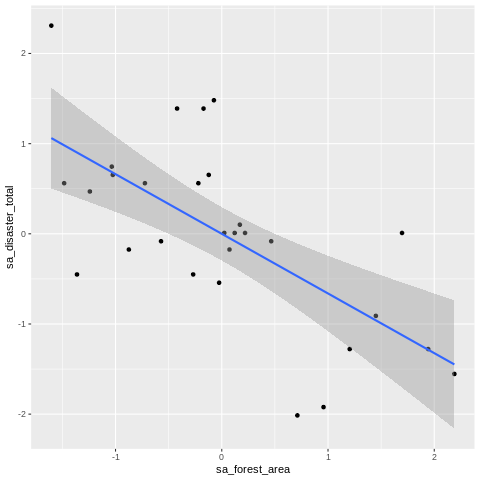

In [455]:
%%R
ggplot(sa_fe_disaster_testing_df, aes(x=sa_forest_area, y=sa_disaster_total)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 1), size = 1) +
          xlab('sa_forest_area') +
          ylab('sa_disaster_total')

# **QUESTION 4**

In [456]:
# Index of East_Asia
ea_idx = np.where(np.array(name_regions) == 'East_Asia')[0][0]

# Index of Southeast_Asia
sa_idx = np.where(np.array(name_regions) == 'Southeast_Asia')[0][0]

# Index of Asia
asia_idx = np.where(np.array(name_regions) == 'ASIA')[0][0]

## **SEA SURFACE TEMPERATURE**

In [457]:
# Get the mean of temperature in different regions
mean_tem_in_regions = []
for region in regions:
    tem_in_region = [national_data[country]['temperature'] for country in region if country in national_data.keys()]
    mean_tem_in_region = np.mean(tem_in_region, axis=0)
    mean_tem_in_regions.append(mean_tem_in_region)

### **EAST ASIA + SOUTH EAST ASIA**

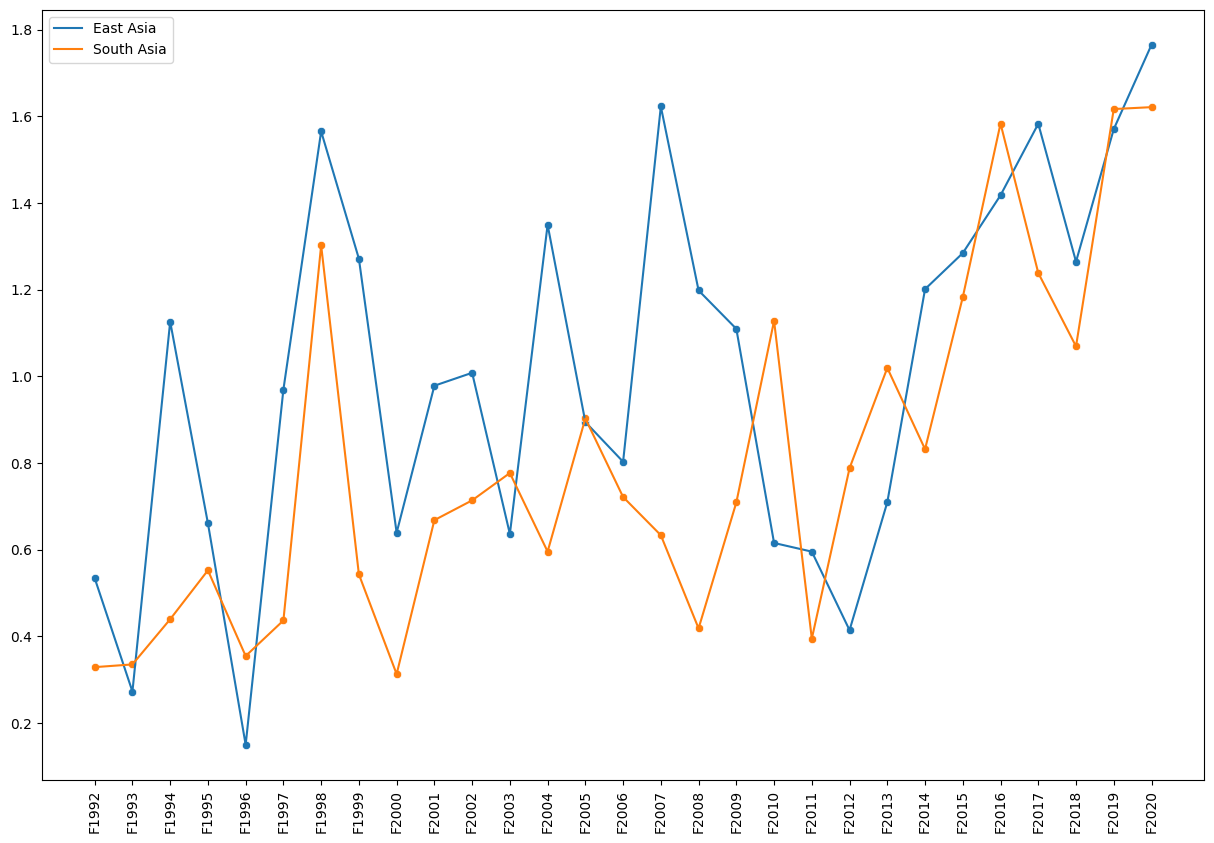

In [458]:
plt.figure(figsize=(15, 10))
ea_mean_tem_val = mean_tem_in_regions[ea_idx]
sa_mean_tem_val = mean_tem_in_regions[sa_idx]

lis = [(ea_mean_tem_val, 'East Asia'), (sa_mean_tem_val, 'South Asia')]

for val, label in lis:
    trace, = plt.plot(val, label=label)
    sns.scatterplot(val)
    plt.xticks(ticks=range(len(val)), labels=timeline, rotation ='vertical')

> *Overall, sea surface temperature in **East_Asia** seems higher than **Southeast_Asia**.*

*  *Two regions adjacent to two different oceans/sea*

### **EAST ASIA + SOUTH EAST ASIA + ASIA**

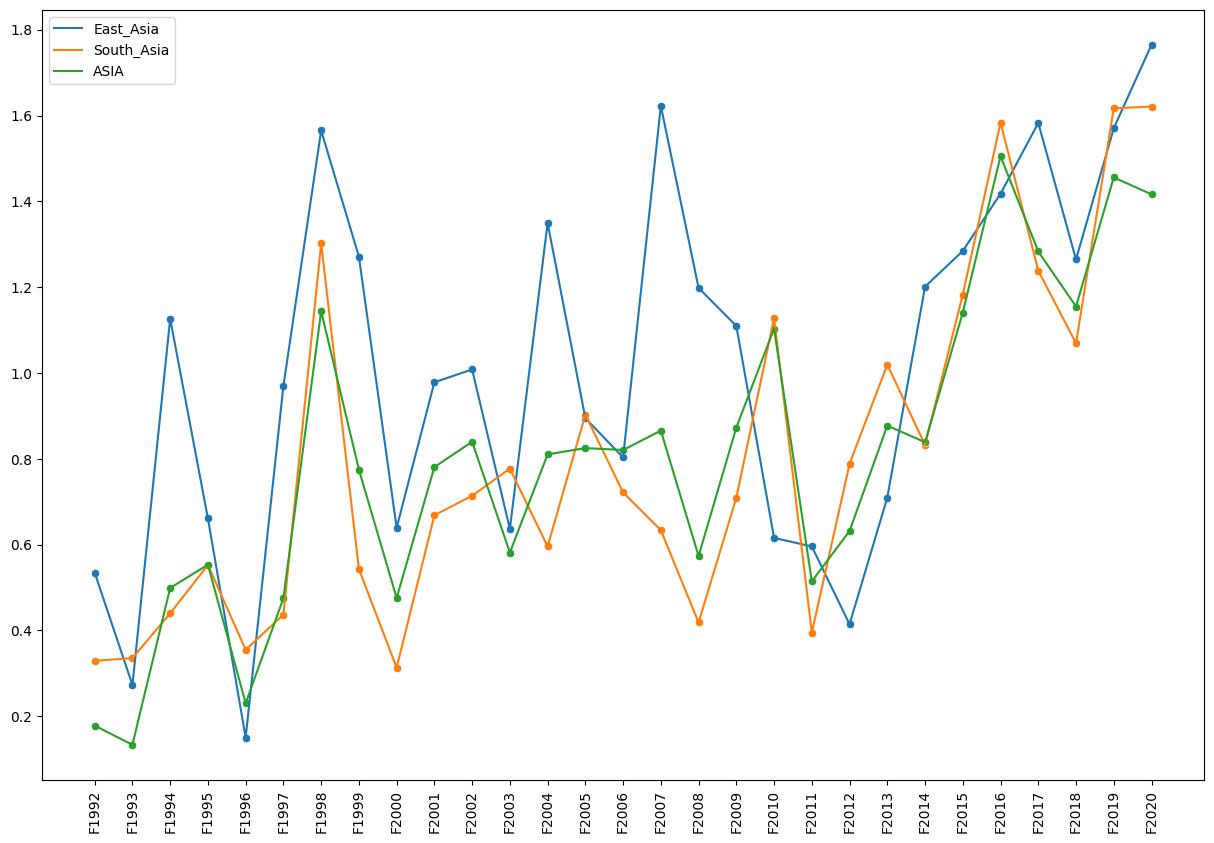

In [459]:
plt.figure(figsize=(15, 10))
asia_mean_tem_val = mean_tem_in_regions[asia_idx]

lis = [(ea_mean_tem_val, 'East_Asia'),
       (sa_mean_tem_val, 'South_Asia'),
       (asia_mean_tem_val, 'ASIA')]

for val, label in lis:
    plt.plot(val, label=label)
    sns.scatterplot(val)
    plt.xticks(ticks=range(len(val)), labels=timeline, rotation ='vertical')

> *The Surface temperature trends in* ***South_Asia*** *approximately similar with* ***ASIA***

> ***South East Asia*** *having mean of surface level higher than that mean of* ***ASIA***



### HYPOTHESIS TESTING WHETHER THE CONCLUSION ABOVE IS CORRECT

In [460]:
diff = ea_mean_tem_val - asia_mean_tem_val

In [461]:
%load_ext rpy2.ipython
pandas2ri.activate()
numpy2ri.activate()
ro.globalenv['diff'] = diff

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [462]:
%%R
dbar <- mean(diff)
s <- sd(diff)
n <- 29
mu <- 0
t <- (dbar-mu)/(s/sqrt(n))
df <- n-1
pt(t,df)

[1] 0.9997296


*   *H0: There is no difference between the mean* ***Surface_Temperature*** of ***East Asia*** and ***Asia***
*   *H1: TThere is difference between the mean* ***Surface_Temperature*** of ***East Asia*** and ***Asia***

*With the 95% confidence level, we do not reject H0 (0.9997296 > 0.05)*

> *There is no difference between the mean* ***Surface_Temperature*** *of* ***East Asia*** *and* ***Asia***.

## **DISASTER**

In [463]:
# Get the mean of temperature in different regions
mean_total_disaster_in_regions = []
for region in regions:
    total_in_region = [national_data[country]['disaster']['TOTAL'] for country in region if country in national_data.keys()]
    total_in_region = [val for val in total_in_region if val.size != 0]
    mean_total_in_region = np.mean(total_in_region, axis=0)
    mean_total_disaster_in_regions.append(mean_total_in_region)

### EAST ASIA + SOUTH EAST ASIA

In [464]:
sns.color_palette()[2]

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

In [465]:
orange = (1.0, 0.4980392156862745, 0.054901960784313725)
blue = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
green = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

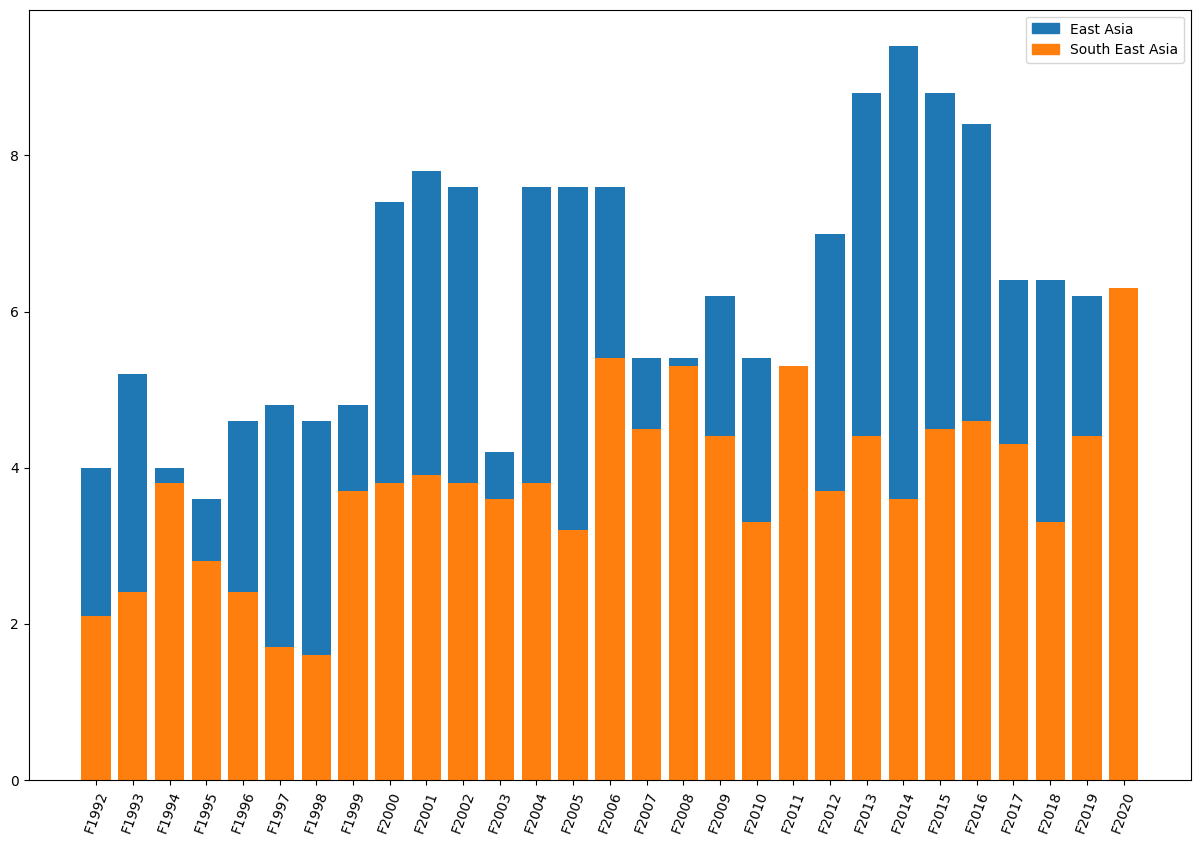

In [466]:
plt.figure(figsize=(15, 10))


lis = [(mean_total_disaster_in_regions[ea_idx], 'East Asia', blue),
       (mean_total_disaster_in_regions[sa_idx], 'South East Asia', orange)]

handles = []
labels = []
for val, name, color in lis:
    plt.bar(x=timeline, height=val, label=name, color=color)
    plt.xticks(ticks=range(len(val)), labels=timeline, rotation=70)
    handle = plt.Rectangle((0,0),1,1, color=color)
    handles.append(handle)
    labels.append(name)

plt.legend(handles, labels)
plt.show()



> ***OVERALL:*** *We can see that ***East Asia*** having disaster frequencies massively more than ***South East Asia***.*



### EAST ASIA + SOUTH EAST ASIA + ASIA

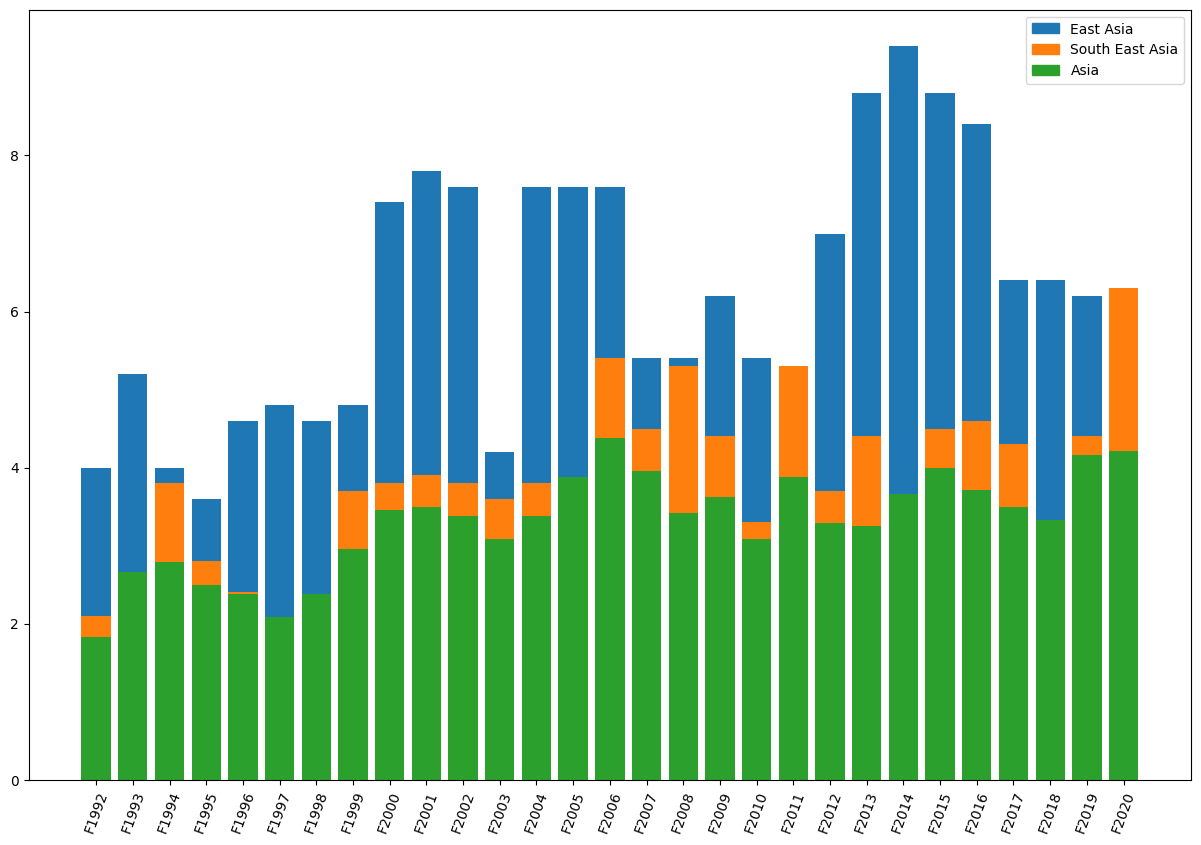

In [467]:
plt.figure(figsize=(15, 10))


lis = [(mean_total_disaster_in_regions[ea_idx], 'East Asia', blue),
       (mean_total_disaster_in_regions[sa_idx], 'South East Asia', orange),
       (mean_total_disaster_in_regions[asia_idx], 'Asia', green)]

handles = []
labels = []
for val, name, color in lis:
    plt.bar(x=timeline, height=val, label=name, color=color)
    plt.xticks(ticks=range(len(val)), labels=timeline, rotation=70)
    handle = plt.Rectangle((0,0),1,1, color=color)
    handles.append(handle)
    labels.append(name)

plt.legend(handles, labels)
plt.show()



> ***OVERALL:*** *We can see that* ***East Asia*** *having disaster frequencies massively more than* ***South East Asia*** *and* ***ASIA***.

> *We conclude that* ***East Asia*** *having the unique temperature/weather characteristic*



### HYPOTHESIS TESTING WHETHER THE CONCLUSION ABOVE IS CORRECT

In [468]:
diff = mean_total_disaster_in_regions[ea_idx] - mean_total_disaster_in_regions[asia_idx]

In [469]:
%load_ext rpy2.ipython
pandas2ri.activate()
numpy2ri.activate()
ro.globalenv['diff'] = diff

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [470]:
%%R
dbar <- mean(diff)
s <- sd(diff)
n <- 29
mu <- 0
t <- (dbar-mu)/(s/sqrt(n))
df <- n-1
pt(t,df)

[1] 1


*   *H0: There is no difference between the mean* ***Disaster_Freq*** *of* ***East Asia*** *and* ***Asia***
*   *H1: There is difference between the mean* ***Disaster_Freq*** *of* ***East Asia*** *and* ***Asia***

*With the 95% confidence level, we do not reject H0 (1 > 0.05)*

> *There is no difference between* ***Disaster_Freq*** *of* ***East Asia*** *and* ***Asia***.

# **QUESTION 5**

In [471]:
# ['Vietnam']
vn_forest_area = mean_of_factor(['Vietnam'], 'forest_area')
vn_temperature = mean_of_factor(['Vietnam'], 'temperature')
vn_carbon_stock = mean_of_factor(['Vietnam'], 'carbon_stock')
vn_disaster_total = mean_of_factor(['Vietnam'], 'disaster', 'TOTAL')

## **INTERACTION OF FOREST_AREA ON TEMPERATURE, CARBON STOCK, DISASTER FREQUENCY**

In [472]:
import statsmodels.api as sm



---



In [473]:
scaler = StandardScaler()
vn_forest_area = scaler.fit_transform(np.array(vn_forest_area).reshape(-1, 1))
vn_temperature = scaler.fit_transform(np.array(vn_temperature).reshape(-1, 1))
vn_carbon_stock = scaler.fit_transform(np.array(vn_carbon_stock).reshape(-1, 1))
vn_disaster_total = scaler.fit_transform(np.array(vn_disaster_total).reshape(-1, 1))

**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON TEMPERATURE**

In [474]:
vn_fe_tem_testing_data = {
    'vn_forest_area': vn_forest_area.flatten(),
    'vn_temperature': vn_temperature.flatten()
}
vn_fe_tem_testing_df = pd.DataFrame(vn_fe_tem_testing_data)
vn_fe_tem_testing_df.head()

,vn_forest_area,vn_temperature
0,-1.917134,-1.370131
1,-1.749014,-0.850573
2,-1.580894,-0.857321
3,-1.412774,-0.749361
4,-1.244654,-1.595048


In [475]:
X_train_lm = sm.add_constant(vn_forest_area)
lm = sm.OLS(vn_temperature, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     16.65
Date:                Sat, 25 May 2024   Prob (F-statistic):           0.000358
Time:                        15:52:08   Log-Likelihood:                -34.185
No. Observations:                  29   AIC:                             72.37
Df Residuals:                      27   BIC:                             75.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.289e-16      0.151   1.51e-15      1.0

***Linear Regression Model***: `vn_temperature = x1 * vn_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

*With the 95% confidence level, we reject H0 (0 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0*


> *Forest_Area factor linearly affects Temperature factor*







---



**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON CARBON_STOCK**

In [476]:
X_train_lm = sm.add_constant(vn_forest_area)
lm = sm.OLS(vn_carbon_stock, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     68.24
Date:                Sat, 25 May 2024   Prob (F-statistic):           7.22e-09
Time:                        15:52:08   Log-Likelihood:                -22.871
No. Observations:                  29   AIC:                             49.74
Df Residuals:                      27   BIC:                             52.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.54e-15      0.102   -1.5e-14      1.0

*Linear Regression Model*: `ea_carbon_stock = x1 * ea_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

*With the 95% confidence level, we reject H0 (0 < 0.025)
Two-tailed test tells that: The distribution of x1 having a mean different from 0*


> *Forest_Area factor linearly affects Carbon_stock factor*







---



**HYPOTHESIS TESTING THE INFLUENCE OF FOREST AREA ON DISASTER FREQUENCY**

In [477]:
X_train_lm = sm.add_constant(vn_forest_area)
lm = sm.OLS(vn_disaster_total, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     7.365
Date:                Sat, 25 May 2024   Prob (F-statistic):             0.0114
Time:                        15:52:08   Log-Likelihood:                -37.652
No. Observations:                  29   AIC:                             79.30
Df Residuals:                      27   BIC:                             82.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.232e-16      0.171   7.22e-16      1.0

*Linear Regression Model:* `ea_disaster_total = x1 * ea_forest_area + const`

*   H0: x1 = 0
*   H1: x1 # 0

*With the 95% confidence level, we do not reject H0 (0.011 < 0.025)*
*Two-tailed test tells that: The distribution of x1 having a mean different from 0*


> *Forest_Area factor linearly affect on Disaster Frequency factor*





## **LACK OF FIT TESTING**



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON TEMPERATURE**

In [478]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
vn_fe_tem_testing_data = {
    'vn_forest_area': vn_forest_area.flatten(),
    'vn_temperature': vn_temperature.flatten()
}
vn_fe_tem_testing_df = pd.DataFrame(vn_fe_tem_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(vn_fe_tem_testing_df)
ro.globalenv['vn_fe_tem_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


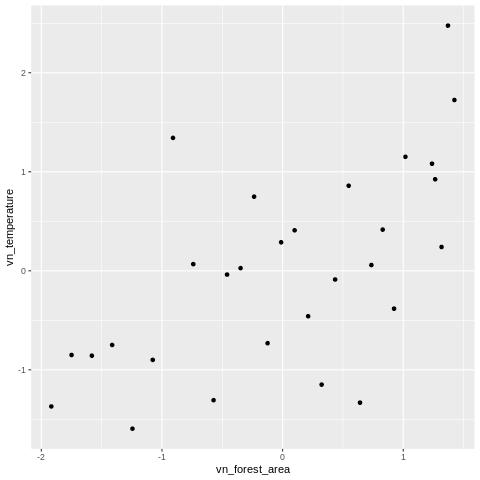

In [479]:
%%R
# Plot
library(ggplot2)
ggplot(vn_fe_tem_testing_df, aes(x=vn_forest_area, y=vn_temperature)) + geom_point()

In [480]:
%%R
#fit full model
full <- lm(vn_temperature ~ poly(vn_forest_area,2), data=vn_fe_tem_testing_df)
#fit reduced model
reduced <- lm(vn_temperature ~ vn_forest_area, data=vn_fe_tem_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df  Sum.of.Sq         F    Pr..F.
1     26 17.34800 NA         NA        NA        NA
2     27 17.93962 -1 -0.5916247 0.8866871 0.3550442


***Reduced model:***  `ea_temperature = b0 + b1*ea_forest_area`

***Full model:***  `ea_temperature = b0 + b1*ea_forest_area + b2*ea_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we do not reject H0 (0.3550442 > 0.05)*

> ***Reduced model offers a statistically better fit on data***

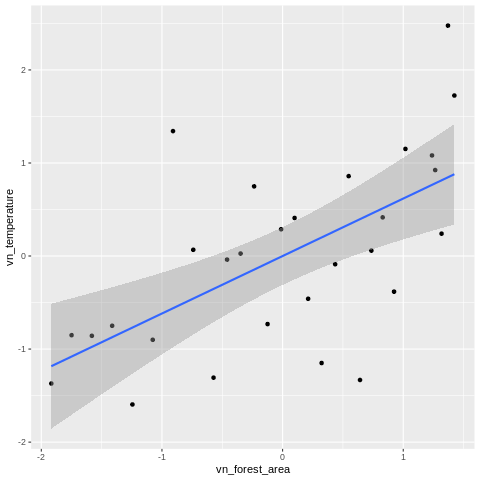

In [481]:
%%R
ggplot(vn_fe_tem_testing_df, aes(x=vn_forest_area, y=vn_temperature)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 1), size = 1) +
          xlab('vn_forest_area') +
          ylab('vn_temperature')



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON CARBON_STOCK**

In [482]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
vn_fe_carbon_stock_testing_data = {
    'vn_forest_area': vn_forest_area.flatten(),
    'vn_carbon_stock': vn_carbon_stock.flatten()
}
vn_fe_carbon_stock_testing_df = pd.DataFrame(vn_fe_carbon_stock_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(vn_fe_carbon_stock_testing_df)
ro.globalenv['vn_fe_carbon_stock_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


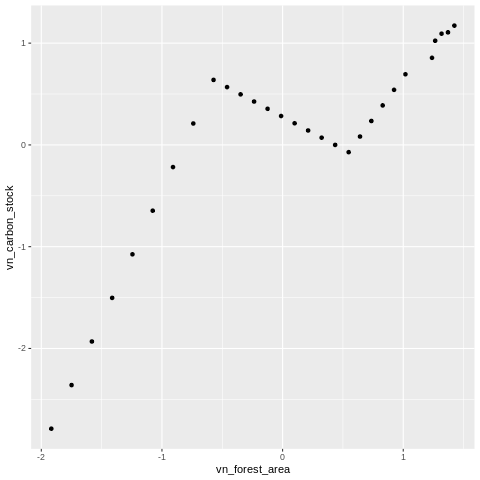

In [483]:
%%R
# Plot
library(ggplot2)
ggplot(vn_fe_carbon_stock_testing_df, aes(x=vn_forest_area, y=vn_carbon_stock)) + geom_point()

In [484]:
%%R
#fit full model
full <- lm(vn_carbon_stock ~ poly(vn_forest_area, 3), data=vn_fe_carbon_stock_testing_df)
#fit reduced model
reduced <- lm(vn_carbon_stock ~ vn_forest_area, data=vn_fe_carbon_stock_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df Sum.of.Sq        F       Pr..F.
1     25 1.355635 NA        NA       NA           NA
2     27 8.221589 -2 -6.865954 63.30937 1.639982e-10


***Reduced model:***  `ea_carbon_stock = b0 + b1*ea_forest_area`

***Full model:***  `ea_carbon_stock = b0 + b1*ea_forest_area + b2*ea_forest_area^2 + b2*ea_forest_area^3`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we reject H0 (1.639982e-10 < 0.05)*

> ***Full model offers a statistically better fit on data***

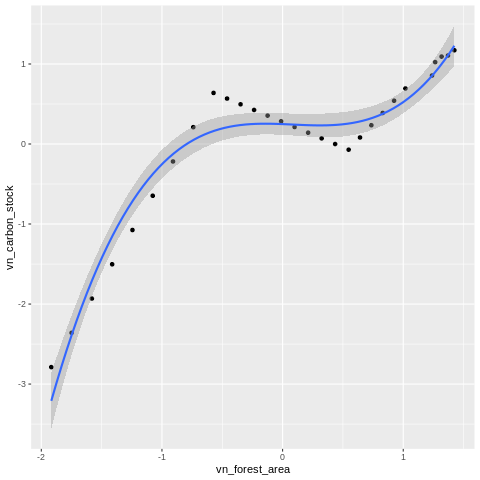

In [485]:
%%R
ggplot(vn_fe_carbon_stock_testing_df, aes(x=vn_forest_area, y=vn_carbon_stock)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 3), size = 1) +
          xlab('vn_forest_area') +
          ylab('vn_carbon_stock')



---



**LACK OF FIT TESTING THE APPROPRIATE MODEL FOR INFLUENCE OF FOREST AREA ON DISASTER FREQUENCY**

In [486]:
pd.DataFrame.iteritems = pd.DataFrame.items
%load_ext rpy2.ipython
vn_fe_disaster_testing_data = {
    'vn_forest_area': vn_forest_area.flatten(),
    'vn_disaster_total': vn_disaster_total.flatten()
}
vn_fe_disaster_testing_df = pd.DataFrame(vn_fe_disaster_testing_data)
pandas2ri.activate()
r_df = ro.conversion.py2rpy(vn_fe_disaster_testing_df)
ro.globalenv['vn_fe_disaster_testing_df'] = r_df

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


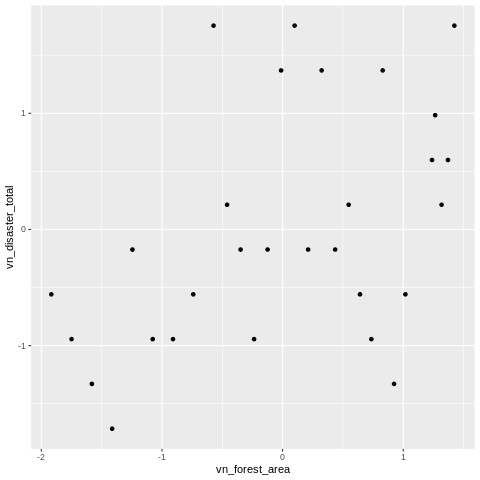

In [487]:
%%R
# Plot
library(ggplot2)
ggplot(vn_fe_disaster_testing_df, aes(x=vn_forest_area, y=vn_disaster_total)) + geom_point()

In [488]:
%%R
#fit full model
full <- lm(vn_disaster_total ~ poly(vn_forest_area, 2), data=vn_fe_disaster_testing_df)
#fit reduced model
reduced <- lm(vn_disaster_total ~ vn_forest_area, data=vn_fe_disaster_testing_df)
# Anova
anova(full, reduced)

  Res.Df      RSS Df  Sum.of.Sq         F   Pr..F.
1     26 22.34558 NA         NA        NA       NA
2     27 22.78500 -1 -0.4394136 0.5112757 0.480959


***Reduced model:***  `ea_disaster_total = b0 + b1*ea_forest_area`

***Full model:***  `ea_disaster_total = b0 + b1*ea_forest_area + b2*ea_forest_area^2`

*   *H0: Reduced model offers a statistically better fit on data*
*   *H1: Full model offers a statistically better fit on data*

*With the 95% confidence level, we do not reject H0 (0.480959 > 0.05)*

> ***Reduced model offers a statistically better fit on data***

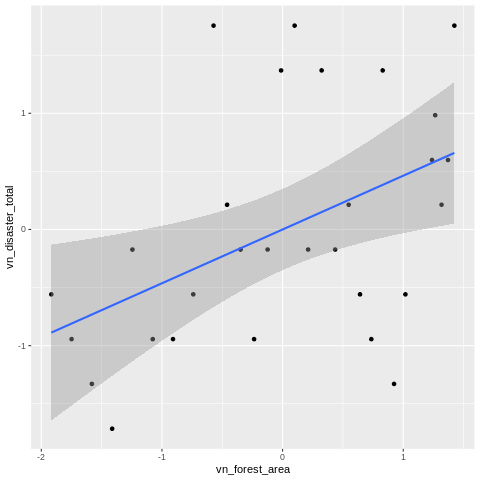

In [489]:
%%R
ggplot(vn_fe_disaster_testing_df, aes(x=vn_forest_area, y=vn_disaster_total)) +
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x, 1), size = 1) +
          xlab('vn_forest_area') +
          ylab('vn_disaster_total')

# **QUESTION 6**

> ***Use the record of previous years to predict the next year***

In [490]:
y_train_timeline = [f'F{i}' for i in range(1993, 2022)]

## DROUGHT

In [491]:
def transform(x):
    if x > 0:
        return 1
    return 0

In [492]:
features = ['temperature', 'forest_area', 'carbon_stock']
X_train_drought_dic = {}

for feature in features:
    X_train_drought_dic[feature] = national_data['Vietnam'][feature]

disasters = ['Flood', 'Landslide', 'Storm', 'Wildfire']
for disaster in disasters:
    X_train_drought_dic[disaster] = national_data['Vietnam']['disaster'][disaster]
X_train_drought = pd.DataFrame(X_train_drought_dic)

In [493]:
y_train_drought = CRDF[(CRDF['Indicator'] == 'Drought') & (CRDF['Country'] == 'Vietnam')][y_train_timeline].values.flatten()
y_train_drought = np.array([transform(val) for val in y_train_drought]).reshape(-1, 1)

In [494]:
columns = ['temperature', 'forest_area', 'carbon_stock', 'Flood', 'Landslide', 'Storm', 'Wildfire', 'label']
drought_pred_df = pd.DataFrame(np.hstack((X_train_drought, y_train_drought)), columns=columns)

### FEATURE SELECTION

<Axes: >

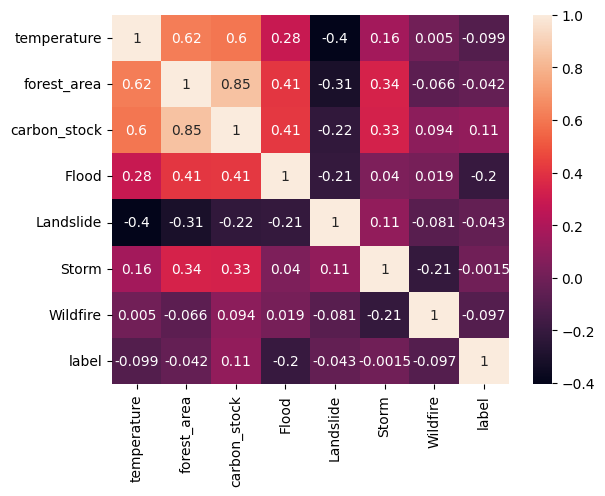

In [495]:
corr_drought = drought_pred_df.corr()
sns.heatmap(corr_drought, annot=True)

In [496]:
taken_features = []
for name, cor in corr_drought.iloc[:-1, -1].items():
    if abs(cor) >= 0.1:
        taken_features.append(name)
taken_features.append('label')
drought_pred_df = drought_pred_df[taken_features]
drought_pred_df.head()

,carbon_stock,Flood,label
0,350.1345,2.0,0.0
1,371.3423,1.0,0.0
2,392.5501,1.0,0.0
3,413.7578,1.0,0.0
4,434.9656,2.0,1.0


In [497]:
taken_features

['carbon_stock', 'Flood', 'label']

### MODELLING

In [498]:
# Use the record of F2020 in VietNam to predict 2023 --> No carbon stock record in 2022
X_test_drought = []
X_test_drought.append(FAC['F2020'][(FAC['Country']=='Vietnam') & (FAC['Indicator']=='Carbon stocks in forests')].values)
selected = ['Flood']
for feature in selected:
    val = CRDF['F2020'][(CRDF['Country']=='Vietnam') & (CRDF['Indicator']==feature)]
    X_test_drought.append(val.values)

X_test_drought = np.array(X_test_drought).flatten().reshape(1, -1)

In [499]:
X_train_drought = drought_pred_df.iloc[:, :-1].values
y_train_drought = drought_pred_df.iloc[:, -1].values

lr = LogisticRegression()
lr.fit(X_train_drought, y_train_drought)
pred = lr.predict_proba(X_test_drought).flatten()

ans = {
    1: 'Yes',
    0: 'No'
}
# print(f'Prediction whether exist Drought in 2023 in Vietnam is {ans[pred[0]]}')
print(f'Prediction whether exist Drought in 2023 in Vietnam is {pred[0]}: Yes - {pred[1]}: No')


Prediction whether exist Drought in 2023 in Vietnam is 0.5168576981959347: Yes - 0.4831423018040653: No


## FLOOD

In [500]:
def transform(x):
    if x > 0:
        return 1
    return 0

In [501]:
features = ['temperature', 'forest_area', 'carbon_stock']
X_train_flood_dic = {}

for feature in features:
    X_train_flood_dic[feature] = national_data['Vietnam'][feature]

disasters = ['Drought', 'Landslide', 'Storm', 'Wildfire']
for disaster in disasters:
    X_train_flood_dic[disaster] = national_data['Vietnam']['disaster'][disaster]
X_train_flood = pd.DataFrame(X_train_flood_dic)

In [502]:
y_train_flood = CRDF[(CRDF['Indicator'] == 'Flood') & (CRDF['Country'] == 'Vietnam')][y_train_timeline].values.flatten()
y_train_flood = np.array([transform(val) for val in y_train_flood]).reshape(-1, 1)

In [503]:
columns = ['temperature', 'forest_area', 'carbon_stock', 'Flood', 'Landslide', 'Storm', 'Wildfire', 'label']
flood_pred_df = pd.DataFrame(np.hstack((X_train_flood, y_train_flood)), columns=columns)

### FEATURE SELECTION

<Axes: >

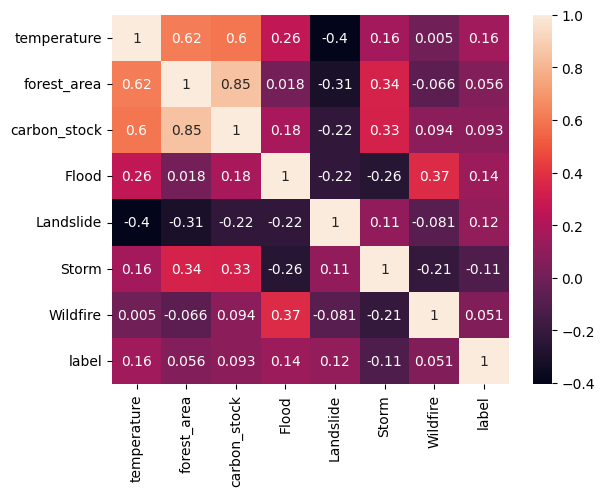

In [504]:
corr_flood = flood_pred_df.corr()
sns.heatmap(corr_flood, annot=True)

In [505]:
taken_features = []
for name, cor in corr_flood.iloc[:-1, -1].items():
    if abs(cor) >= 0.1:
        taken_features.append(name)
taken_features.append('label')
flood_pred_df = flood_pred_df[taken_features]
flood_pred_df.head()

,temperature,Flood,Landslide,Storm,label
0,0.101,0.0,1.0,2.0,1.0
1,0.332,0.0,0.0,3.0,1.0
2,0.329,0.0,1.0,1.0,1.0
3,0.377,0.0,0.0,1.0,1.0
4,0.001,0.0,0.0,4.0,0.0


In [506]:
taken_features

['temperature', 'Flood', 'Landslide', 'Storm', 'label']

### MODELLING

In [507]:
# Use the record of F2022 in VietNam to predict 2023
X_test_flood = []
X_test_flood.append(ASTC['F2022'][ASTC['Country']=='Vietnam'].values)
selected = ['Flood', 'Landslide', 'Storm']
for feature in selected:
    val = CRDF['F2022'][(CRDF['Country']=='Vietnam') & (CRDF['Indicator']==feature)]
    X_test_flood.append(val.values)

X_test_flood = np.array(X_test_flood).flatten().reshape(1, -1)

In [508]:
X_train_flood = flood_pred_df.iloc[:, :-1].values
y_train_flood = flood_pred_df.iloc[:, -1].values

lr = LogisticRegression()
lr.fit(X_train_flood, y_train_flood)
pred = lr.predict_proba(X_test_flood).flatten()

ans = {
    1: 'Yes',
    0: 'No'
}
# print(f'Prediction whether exist flood in 2023 in Vietnam is {ans[pred[0]]}')
print(f'Prediction whether exist flood in 2023 in Vietnam is {pred[0]}: Yes - {pred[1]}: No')


Prediction whether exist flood in 2023 in Vietnam is 0.01683517165743298: Yes - 0.983164828342567: No
